In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

#statistical libraries
from statsmodels.tsa.stattools import coint, adfuller, kpss
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as rg
from sklearn.model_selection import train_test_split
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from scipy.stats import skew,kurtosis,stats
from statsmodels.stats.stattools import jarque_bera
from scipy.spatial import distance
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pmdarima.arima import auto_arima

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [2]:
df = yf.download(tickers='BTC-USD LTC-USD ETH-USD DOGE-USD XRP-USD',start = '2016-01-01', end='2021-06-30', interval = '1d')

[*********************100%***********************]  5 of 5 completed


In [3]:
df = pd.read_excel('pairstrading.xlsx')

In [4]:
print(df)

           Date  BTC-USD Adj Close  DOGE-USD Adj Close  ETH-USD Adj Close  \
0    2016-01-01         434.334015            0.001145         320.884003   
1    2016-01-02         433.437988            0.001084         299.252991   
2    2016-01-03         430.010986            0.001085         314.681000   
3    2016-01-04         433.091003            0.001108         307.907990   
4    2016-01-05         431.959991            0.001024         316.716003   
...         ...                ...                 ...                ...   
2003 2021-06-26       32186.277344            0.244784        1829.239258   
2004 2021-06-27       34649.644531            0.264450        1978.894653   
2005 2021-06-28       34434.335938            0.256857        2079.657471   
2006 2021-06-29       35867.777344            0.262769        2160.768311   
2007 2021-06-30       35040.835938            0.254215        2274.547607   

      LTC-USD Adj Close  XRP-USD Adj Close  BTC-USD Close  DOGE-USD Close  

In [5]:
df.isna().sum()

Date                    0
BTC-USD Adj Close       0
DOGE-USD Adj Close      0
ETH-USD Adj Close       0
LTC-USD Adj Close       0
XRP-USD Adj Close       0
BTC-USD Close           0
DOGE-USD Close          0
ETH-USD Close           0
LTC-USD Close           0
XRP-USD Close           0
BTC-USD High            0
DOGE-USD High           0
ETH-USD High            0
LTC-USD High            0
XRP-USD High            0
BTC-USD Low             0
DOGE-USD Low            0
ETH-USD Low             0
LTC-USD Low             0
XRP-USD Low             0
BTC-USD Open            0
DOGE-USD Open           0
ETH-USD Open            0
LTC-USD Open            0
XRP-USD Open            0
BTC-USD Volume          0
DOGE-USD Volume         0
ETH-USD Volume          0
LTC-USD Volume        655
XRP-USD Volume          0
dtype: int64

In [6]:
data = pd.DataFrame(df)
data

,Date,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,XRP-USD Adj Close,BTC-USD Close,DOGE-USD Close,ETH-USD Close,LTC-USD Close,...,BTC-USD Open,DOGE-USD Open,ETH-USD Open,LTC-USD Open,XRP-USD Open,BTC-USD Volume,DOGE-USD Volume,ETH-USD Volume,LTC-USD Volume,XRP-USD Volume
0,2016-01-01,434.334015,0.001145,320.884003,3.508980,0.197529,434.334015,0.001145,320.884003,3.508980,...,427.515015,0.001091,291.476990,3.479520,0.193824,36278900,4092970,332439008,131446000.0,2791170
1,2016-01-02,433.437988,0.001084,299.252991,3.502160,0.206532,433.437988,0.001084,299.252991,3.502160,...,431.869995,0.001142,301.546997,3.515280,0.197622,30096600,4295630,306184992,100183000.0,3020260
2,2016-01-03,430.010986,0.001085,314.681000,3.483070,0.202676,430.010986,0.001085,314.681000,3.483070,...,424.705994,0.001075,302.481995,3.504000,0.206077,39633800,3145110,339443008,95474600.0,2406150
3,2016-01-04,433.091003,0.001108,307.907990,3.495390,0.203318,433.091003,0.001108,307.907990,3.495390,...,429.084015,0.001085,297.483002,3.479100,0.203209,38477500,2044110,321680000,88516096.0,3309740
4,2016-01-05,431.959991,0.001024,316.716003,3.469670,0.214774,431.959991,0.001024,316.716003,3.469670,...,429.675995,0.001121,292.753998,3.492000,0.203218,34522600,2119210,257906000,77473400.0,2104650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2021-06-26,32186.277344,0.244784,1829.239258,126.657257,0.615435,32186.277344,0.244784,1829.239258,126.657257,...,30184.501953,0.237673,1810.884277,125.393433,0.611586,38585385521,2649457302,20637542361,NaN,2064657166
2004,2021-06-27,34649.644531,0.264450,1978.894653,132.347885,0.646923,34649.644531,0.264450,1978.894653,132.347885,...,32071.757813,0.246045,1830.996948,126.893791,0.616994,35511640894,2167521670,19885474742,NaN,1804264433
2005,2021-06-28,34434.335938,0.256857,2079.657471,137.370850,0.643746,34434.335938,0.256857,2079.657471,137.370850,...,33902.074219,0.264918,1981.386475,132.592697,0.648285,33892523752,1932994784,25514602841,NaN,1877529989
2006,2021-06-29,35867.777344,0.262769,2160.768311,143.702911,0.701725,35867.777344,0.262769,2160.768311,143.702911,...,34252.484375,0.257061,2083.448730,137.613098,0.643941,37901460044,2192562738,24815124419,NaN,2182136698


In [7]:
data = df[['BTC-USD Adj Close','DOGE-USD Adj Close','ETH-USD Adj Close','LTC-USD Adj Close','XRP-USD Adj Close']]
data
data1 = np.log(data)
data1

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,XRP-USD Adj Close
0,6.073814,-6.772351,5.771080,1.255325,-1.621870
1,6.071749,-6.827097,5.701289,1.253380,-1.577300
2,6.063811,-6.826175,5.751559,1.247914,-1.596147
3,6.070948,-6.805199,5.729801,1.251445,-1.592984
4,6.068333,-6.884039,5.758005,1.244059,-1.538169
...,...,...,...,...,...
2003,10.379295,-1.407379,7.511655,4.841485,-0.485426
2004,10.453043,-1.330103,7.590294,4.885434,-0.435528
2005,10.446809,-1.359236,7.639958,4.922684,-0.440451
2006,10.487595,-1.336480,7.678219,4.967748,-0.354214


In [8]:
data.isna().sum()

BTC-USD Adj Close     0
DOGE-USD Adj Close    0
ETH-USD Adj Close     0
LTC-USD Adj Close     0
XRP-USD Adj Close     0
dtype: int64

In [9]:
data1.tail()

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,XRP-USD Adj Close
2003,10.379295,-1.407379,7.511655,4.841485,-0.485426
2004,10.453043,-1.330103,7.590294,4.885434,-0.435528
2005,10.446809,-1.359236,7.639958,4.922684,-0.440451
2006,10.487595,-1.336480,7.678219,4.967748,-0.354214
2007,10.464269,-1.369575,7.729536,4.970756,-0.347610


In [10]:
data.describe()

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,XRP-USD Adj Close
count,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,9717.358966,0.019046,504.066519,69.885892,0.487250
std,12618.544678,0.071473,585.785550,67.748326,0.389440
min,364.330994,0.000991,84.308296,2.996780,0.139635
25%,1846.199951,0.002402,178.725494,25.125379,0.274441
50%,6788.574707,0.002914,269.327500,52.919453,0.342379
75%,10074.201416,0.004473,566.013244,88.096319,0.534691
max,63503.457031,0.684777,4168.701172,386.450775,3.377810


In [11]:
data.skew()

BTC-USD Adj Close     2.531208
DOGE-USD Adj Close    5.418518
ETH-USD Adj Close     2.832420
LTC-USD Adj Close     1.567461
XRP-USD Adj Close     3.249193
dtype: float64

In [12]:
data.kurtosis()

BTC-USD Adj Close      6.092257
DOGE-USD Adj Close    31.266480
ETH-USD Adj Close      9.204603
LTC-USD Adj Close      2.548552
XRP-USD Adj Close     14.510202
dtype: float64

### Training Data and Testing Data split 

In [13]:
train_data, test_data = train_test_split(data1, test_size=0.2, shuffle=False)

In [14]:
# quick view of head and tail of train set
train_data.head(2).append(train_data.tail(2))

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,XRP-USD Adj Close
0,6.073814,-6.772351,5.771080,1.255325,-1.621870
1,6.071749,-6.827097,5.701289,1.253380,-1.577300
1604,9.127968,-5.974018,5.340871,3.784942,-1.615174
1605,9.081412,-6.008407,5.310099,3.748301,-1.632548


## Pearson correlation to get the basic idea about the relationship

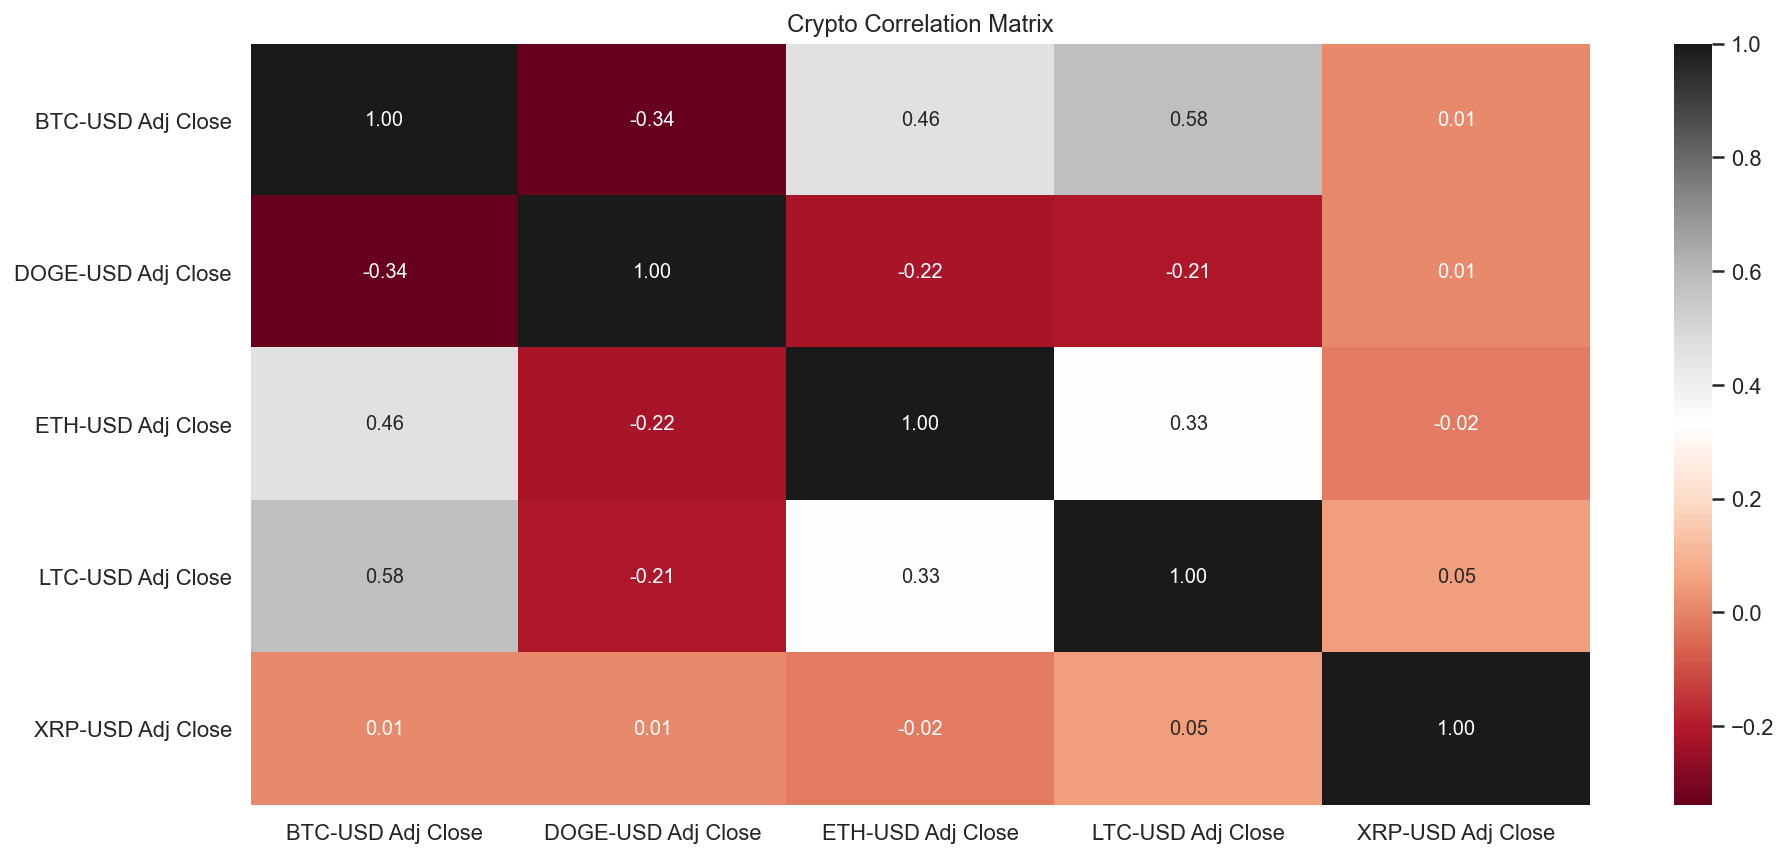

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train_data.pct_change().corr(method ='pearson'), ax=ax, cmap='RdGy', annot=True, fmt=".2f")
#spearman
ax.set_title('Crypto Correlation Matrix')
plt.show('images/chart1')

## Function to find cointegrated pairs

In [16]:
def find_cointegrated_pairs(data1):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

### Calculate p-values and plot as a heatmap

[('BTC-USD Adj Close', 'DOGE-USD Adj Close'), ('BTC-USD Adj Close', 'ETH-USD Adj Close'), ('DOGE-USD Adj Close', 'ETH-USD Adj Close')]


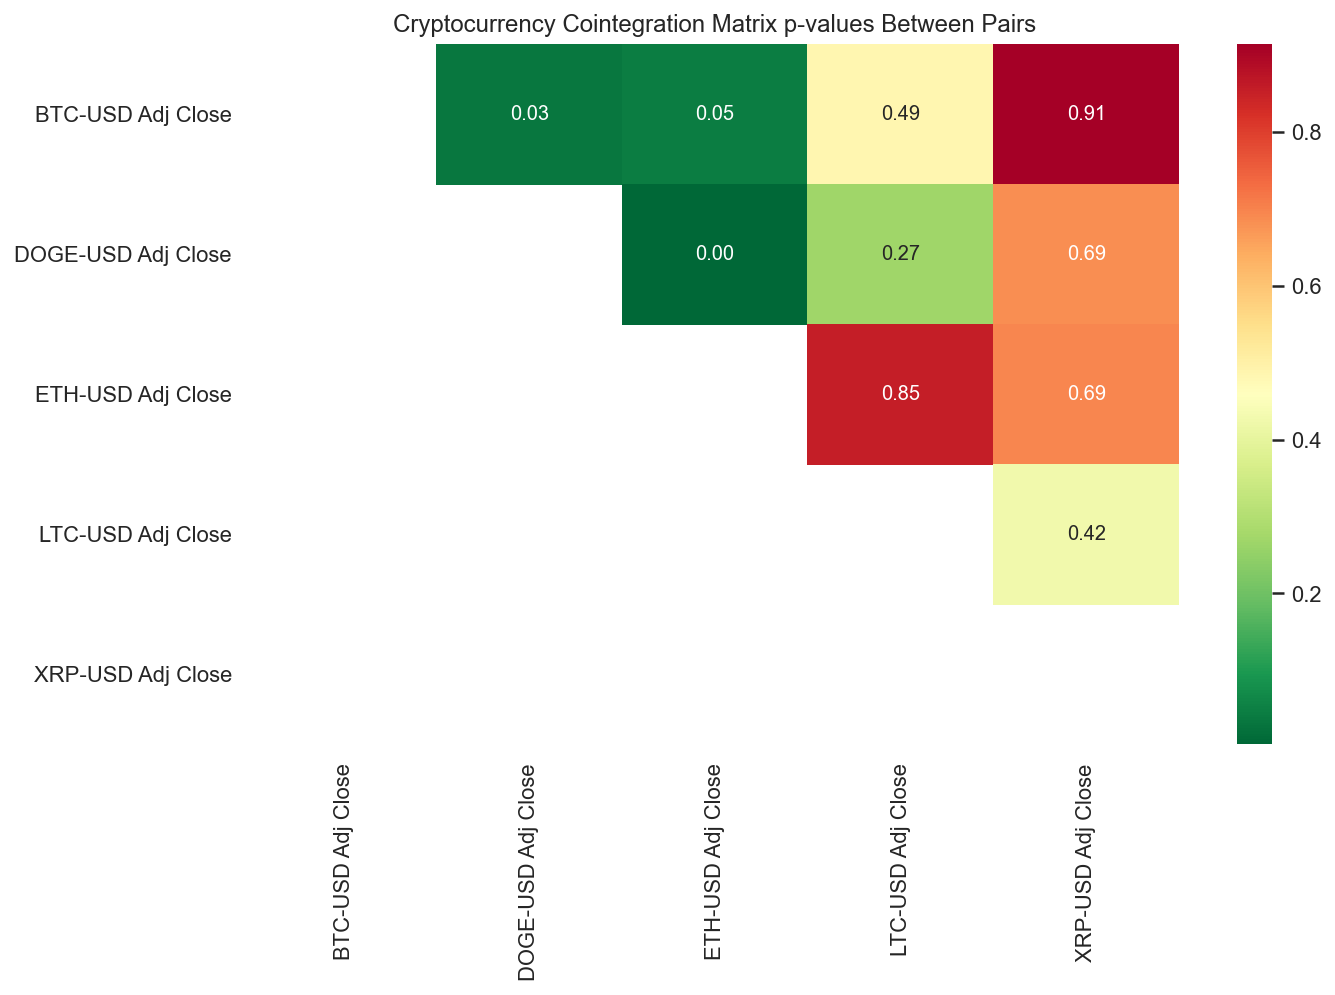

In [17]:
pvalues, pairs = find_cointegrated_pairs(train_data)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_data.columns,
                yticklabels = train_data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Cryptocurrency Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.show('images/chart2')

# Cointegration test for the Selected Pair - 0 BTC/USD & ETH/USD

In [18]:
BTC = 'BTC-USD Adj Close'
ETH = 'ETH-USD Adj Close'


In [19]:
train = pd.DataFrame()
train['BTC/USD'] = train_data[BTC]
train['ETH/USD'] = train_data[ETH]

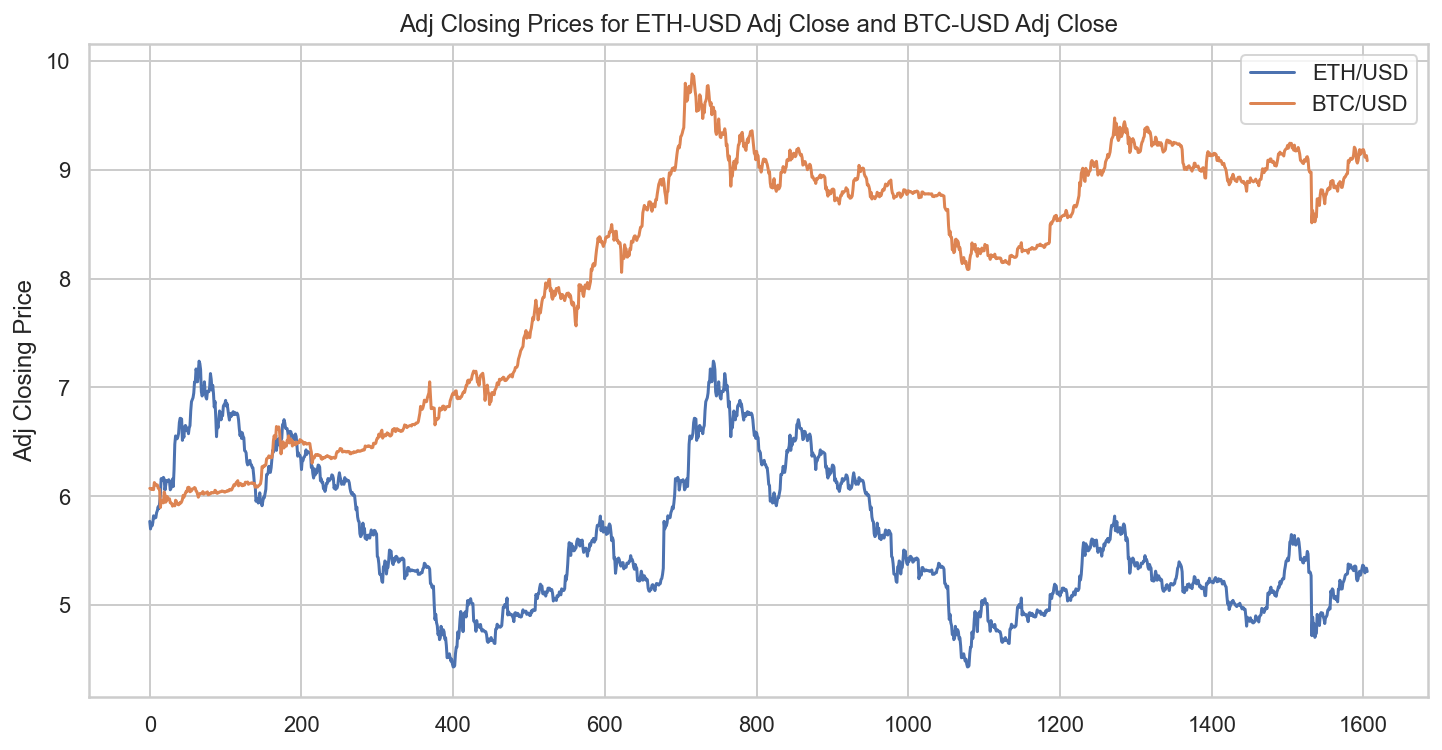

In [20]:
# visualize closing prices
ax = train[['ETH/USD','BTC/USD']].plot(figsize=(12, 6), title = 'Adj Closing Prices for {} and {}'.format(ETH,BTC))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart8')

## Johansen cointegration test

In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
jres = coint_johansen(train,0,1)


In [22]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [23]:
joh_output(jres)

   max_eig_stat  trace_stat
0      7.777319    9.172887
1      1.395568    1.395568 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



# Cointegration test for the Selected Pair - 1 BTC/USD & DOGE/USD 

###  Pair to test strategy

In [24]:
BTC = 'BTC-USD Adj Close'
DOGE =  'DOGE-USD Adj Close'

### Create a train dataframe of 2 assets

In [25]:
train = pd.DataFrame()
train['BTC/USD'] = train_data[BTC]
train['DOGE/USD'] = train_data[DOGE]

### Visualize closing prices

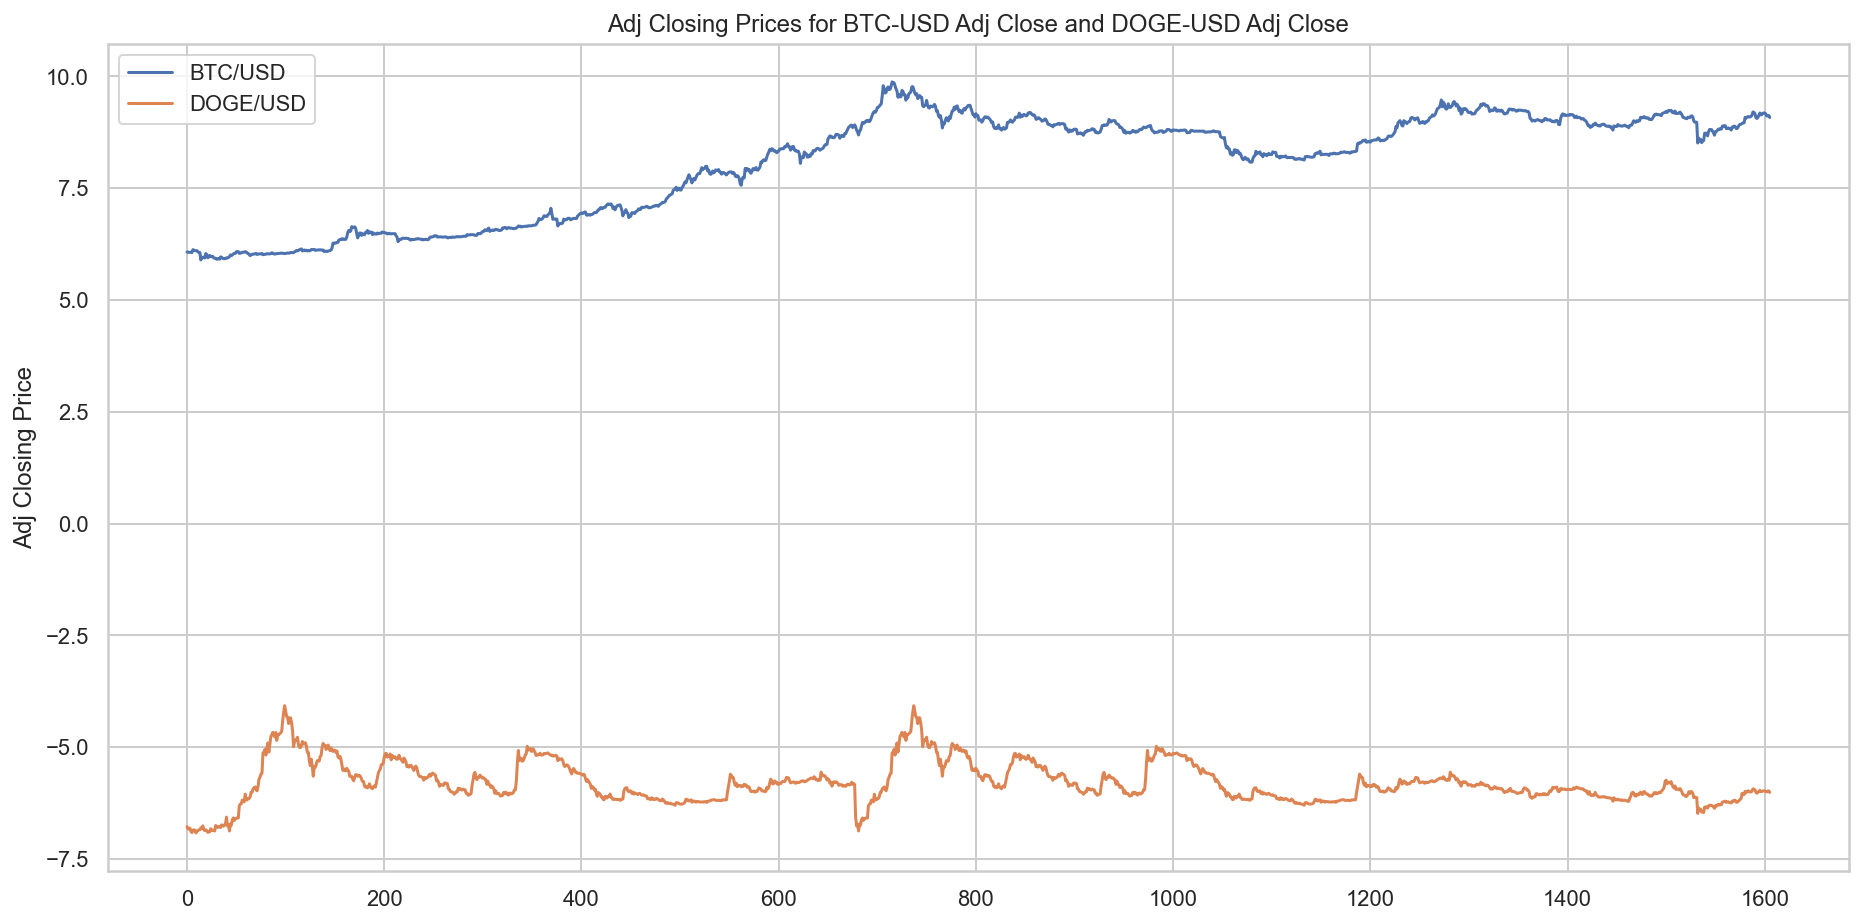

In [26]:
ax = train[['BTC/USD','DOGE/USD']].plot(figsize=(15.6, 7.6), title = 'Adj Closing Prices for {} and {}'.format(BTC,DOGE))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart8')

## Johansen cointegration test

In [27]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
jres = coint_johansen(train,0,1)

In [28]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [29]:
joh_output(jres)

   max_eig_stat  trace_stat
0     15.041781   16.169209
1      1.127428    1.127428 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



### Run OLS regression

In [30]:
model=sm.OLS(train['BTC/USD'], train['DOGE/USD']).fit()

### Print regression summary results

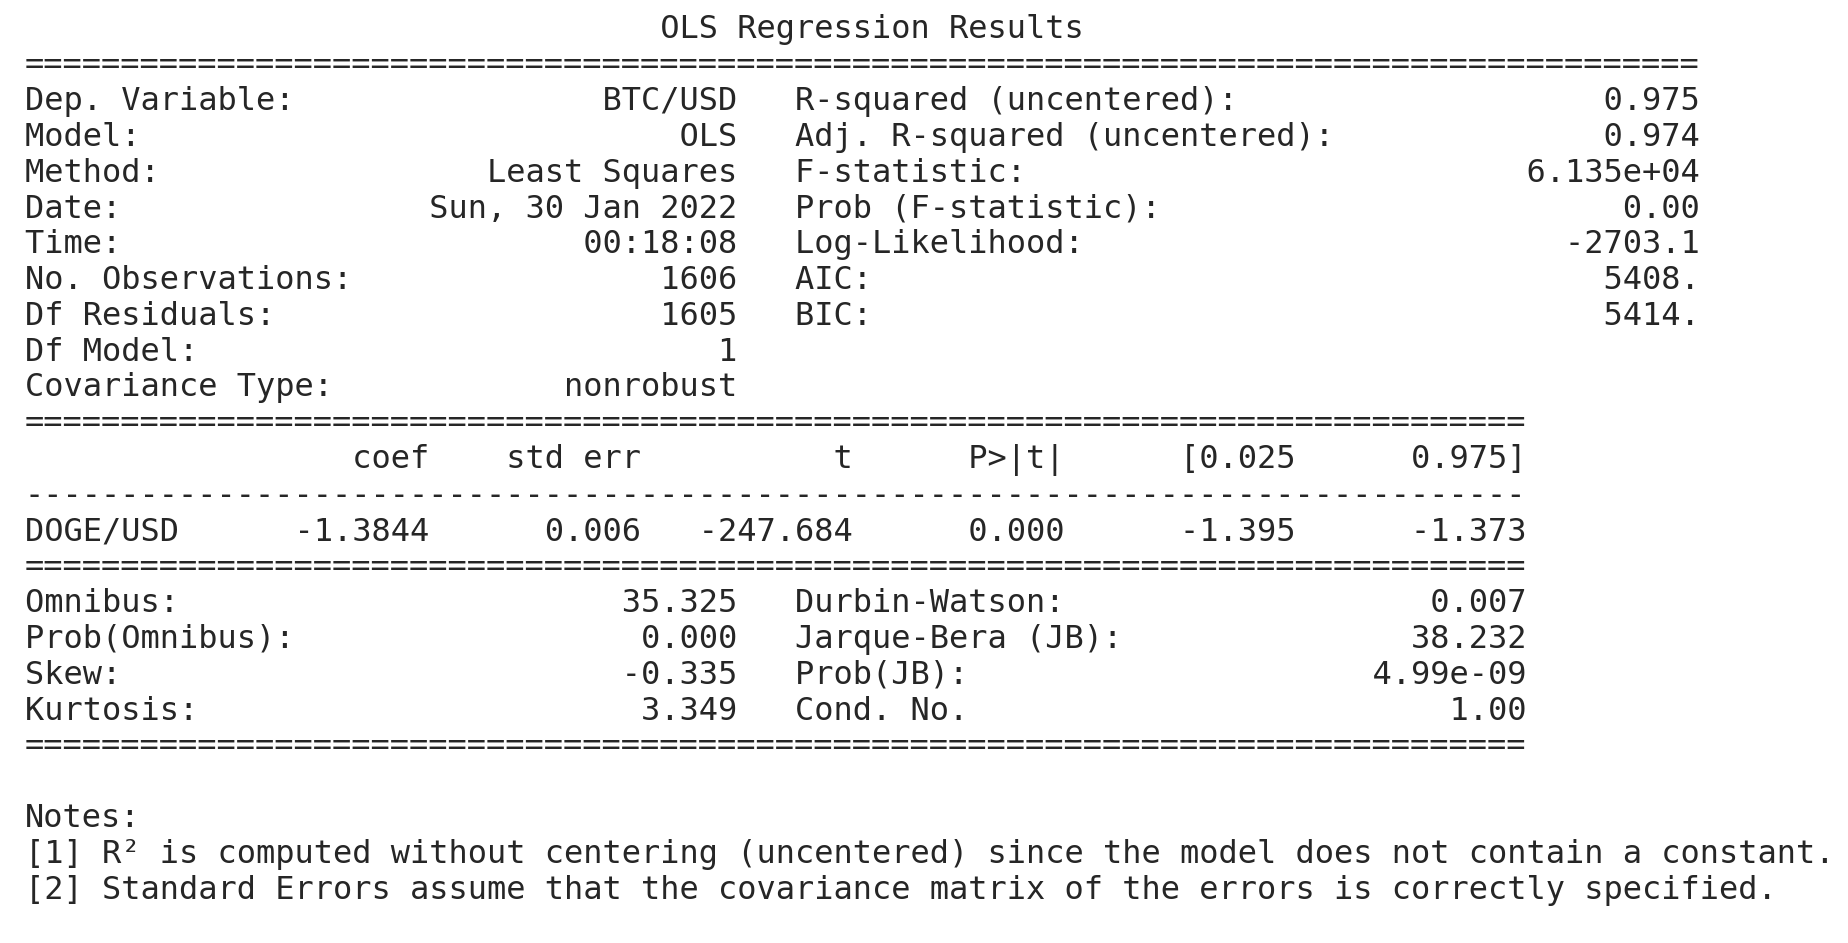

In [31]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.show('images/chart4');

In [32]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  -1.3844141553498976


### Calculate spread

In [33]:
spread = train['BTC/USD'] - model.params[0] * train['DOGE/USD']

### Plot the spread

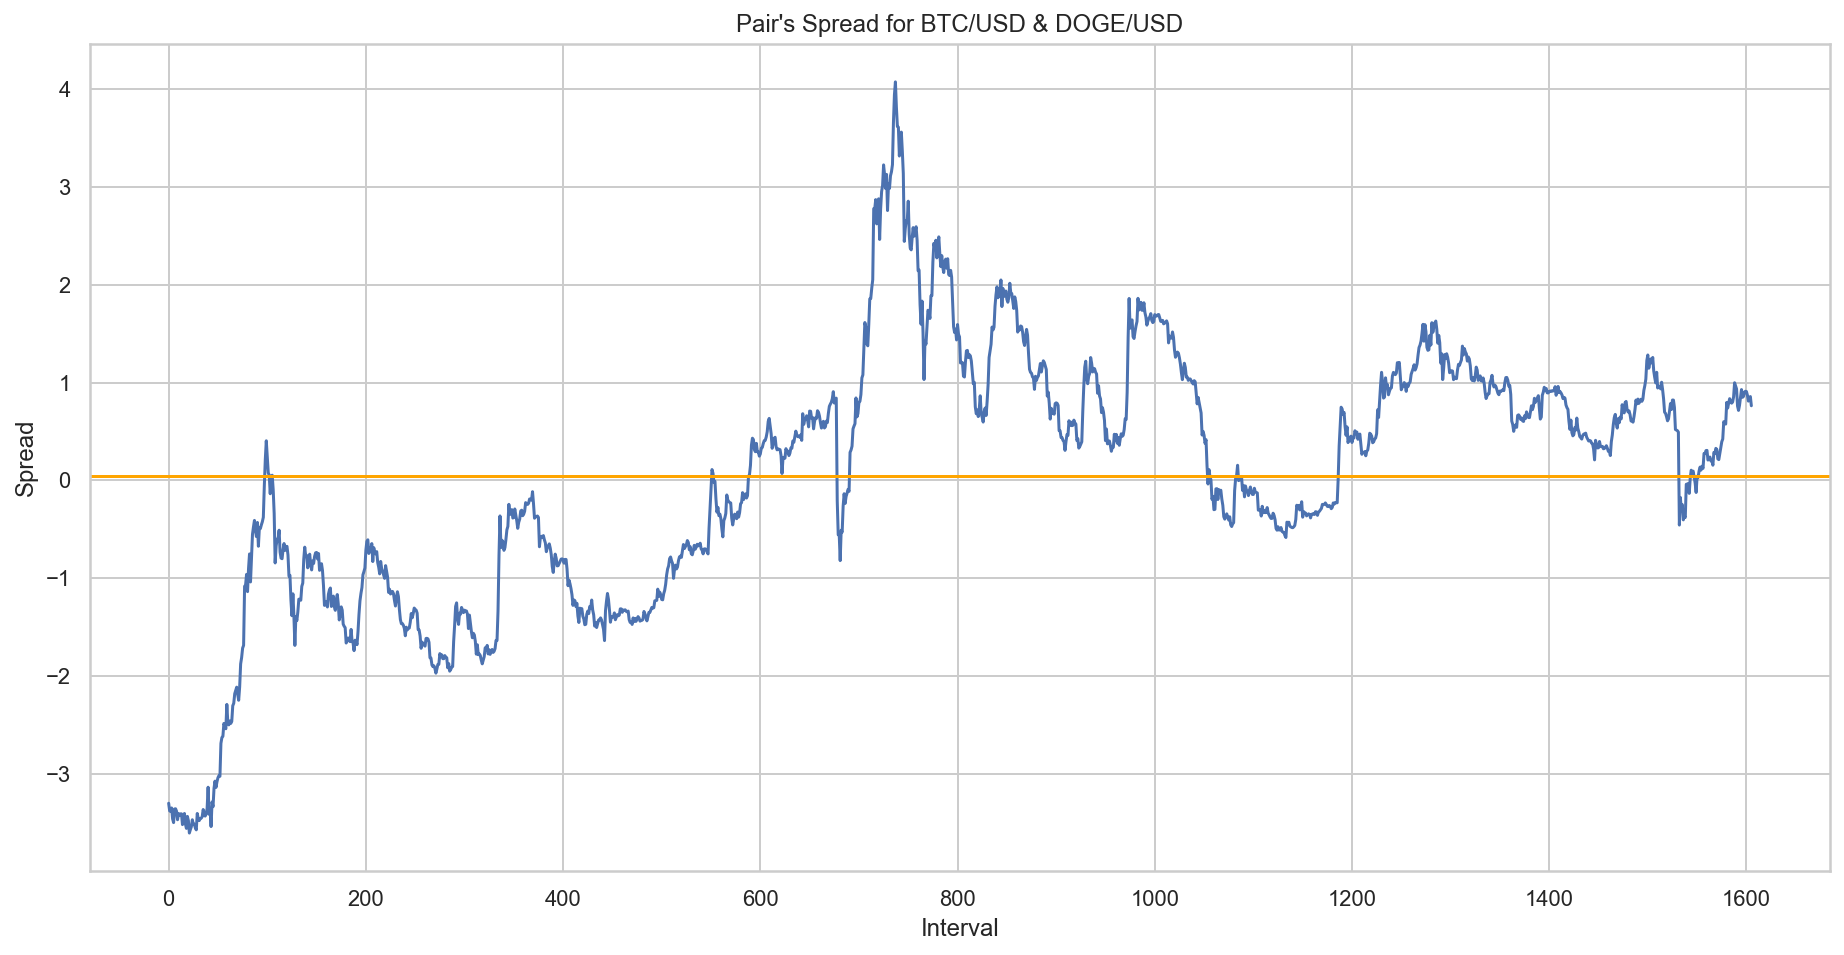

In [34]:
ax = spread.plot(figsize=(15.6, 7.6), title = "Pair's Spread for BTC/USD & DOGE/USD")
plt.axhline(spread.mean(),color='orange')
ax.set_ylabel("Spread")
ax.set_xlabel("Interval")
ax.grid(True);
plt.show('images/chart5');

## Generate Trading Signals using z-score - BTC/USD & DOGE/USD

### Calculate z-score

In [35]:
def zscore(series):
    return (series - series.rolling(window = 30).mean()) / series.rolling(window=30).std()

### Create a dataframe for trading signals

In [36]:
signals = pd.DataFrame()
signals['BTC/USD'] = test_data[BTC] 
signals['DOGE/USD'] = test_data[DOGE]
ratios = signals['BTC/USD'] / signals['DOGE/USD']

### Calculate z-score and define upper and lower thresholds

In [37]:
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

### Creating signal - short if z-score is greater than upper limit else long

In [38]:
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

###  Taking the first order difference to obtain portfolio position in that stock

In [39]:
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

### Visualizing z-score and upper and lower thresholds

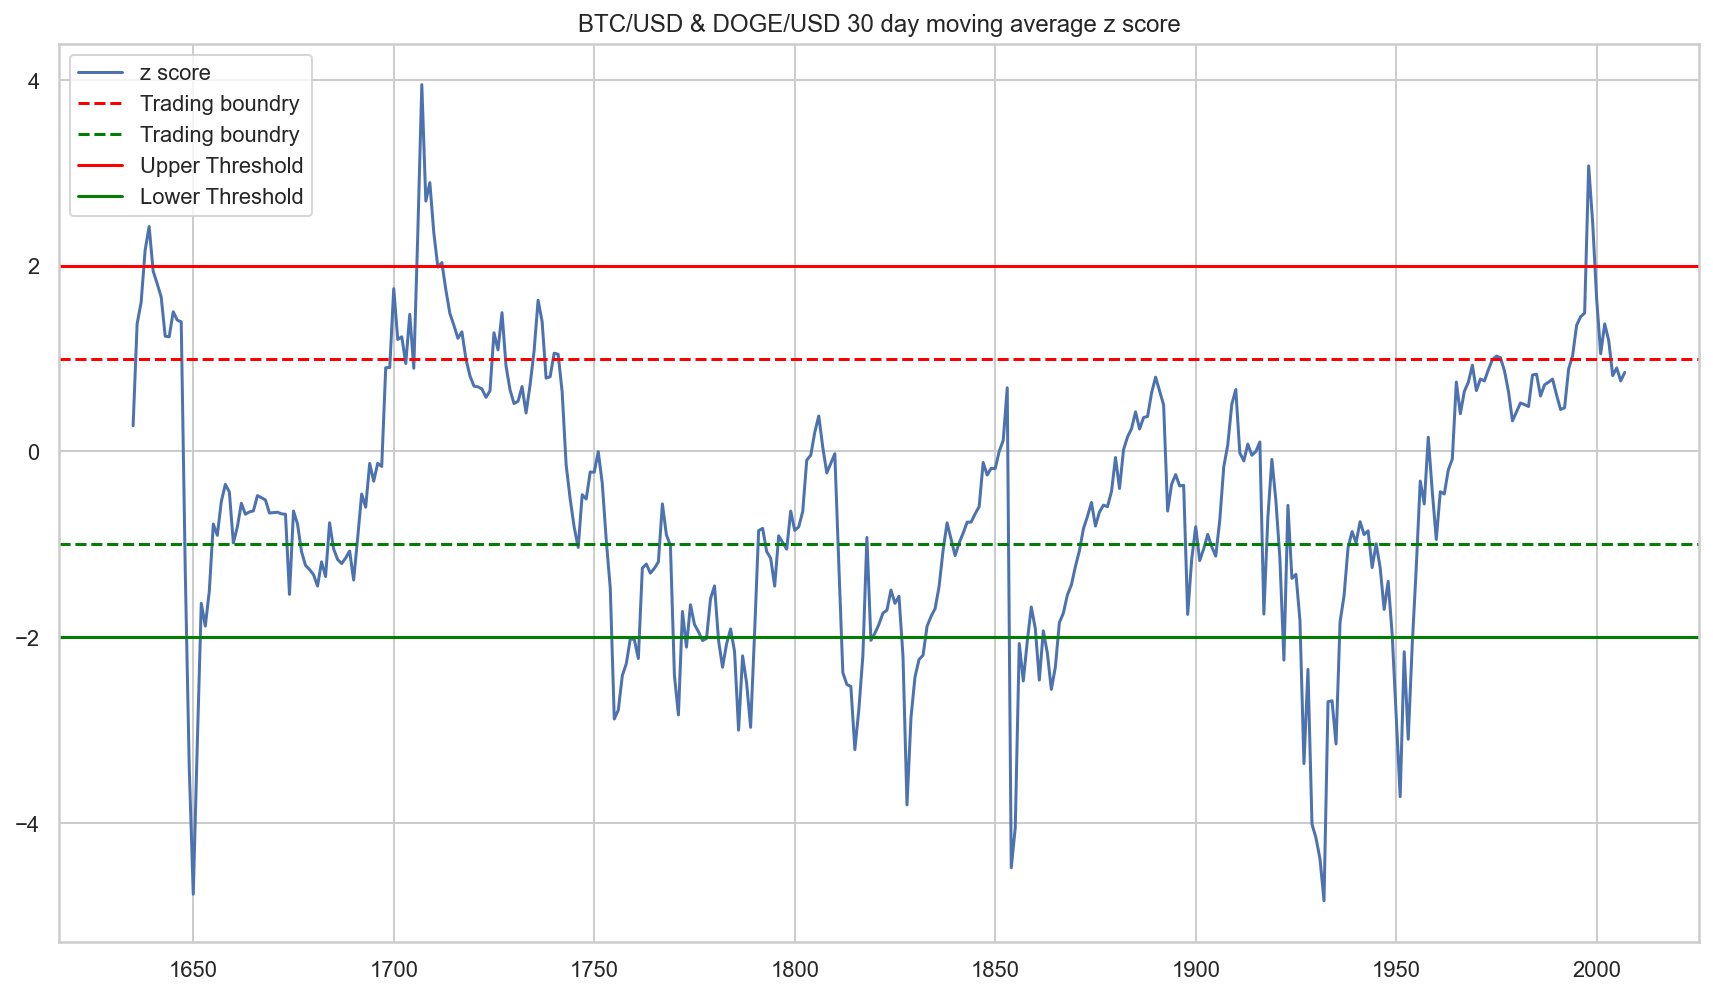

In [40]:
signals['z'].plot(label="z score ")
plt.title("BTC/USD & DOGE/USD 30 day moving average z score")
plt.axhline((1), color="red",linestyle = '--', label="Trading boundry")
plt.axhline((-1), color="green",linestyle ='--' , label="Trading boundry")
plt.axhline((2), color="red", label="Upper Threshold")
plt.axhline((-2), color="green",label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.show('images/chart6');

### Verifying dataframe head and tail

In [41]:
signals.head(10).append(signals.tail(10))

,BTC/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1606,9.094585,-5.975591,NaN,0.842954,-2.001724,0,NaN,0,NaN
1607,9.086482,-5.997080,NaN,0.842954,-2.001724,0,0.0,0,0.0
1608,9.124893,-5.987473,NaN,0.842954,-2.001724,0,0.0,0,0.0
1609,9.161754,-5.981910,NaN,0.842954,-2.001724,0,0.0,0,0.0
1610,9.152618,-5.978746,NaN,0.842954,-2.001724,0,0.0,0,0.0
1611,9.179924,-5.946491,NaN,0.842954,-2.001724,0,0.0,0,0.0
1612,9.154940,-5.969703,NaN,0.842954,-2.001724,0,0.0,0,0.0
1613,9.226929,-5.934328,NaN,0.842954,-2.001724,0,0.0,0,0.0
1614,9.162179,-5.967357,NaN,0.842954,-2.001724,0,0.0,0,0.0
1615,9.175409,-5.958804,NaN,0.842954,-2.001724,0,0.0,0,0.0


### Checking portfolio position

In [42]:
signals[signals.signals1 != 0].head()

,BTC/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1636,9.139232,-6.019864,1.373954,0.842954,-2.001724,-1,-1.0,1,1.0
1637,9.133979,-6.025228,1.606587,0.842954,-2.001724,-1,0.0,1,0.0
1638,9.122920,-6.049517,2.167960,0.842954,-2.001724,-1,0.0,1,0.0
1639,9.110011,-6.069210,2.422970,0.842954,-2.001724,-1,0.0,1,0.0
1640,9.120807,-6.063605,1.942564,0.842954,-2.001724,-1,0.0,1,0.0


In [43]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

,BTC/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1606,9.094585,-5.975591,NaN,0.842954,-2.001724,0,NaN,0,NaN
1636,9.139232,-6.019864,1.373954,0.842954,-2.001724,-1,-1.0,1,1.0
1648,9.145852,-5.946109,-1.269096,0.842954,-2.001724,0,1.0,0,-1.0
1649,9.132625,-5.779584,-3.403346,0.842954,-2.001724,1,1.0,-1,-1.0
1652,9.135488,-5.650716,-1.634869,0.842954,-2.001724,0,-1.0,0,1.0
1993,10.554433,-1.178432,0.888260,0.842954,-2.001724,-1,-1.0,1,1.0
2004,10.453043,-1.330103,0.816708,0.842954,-2.001724,0,1.0,0,-1.0
2005,10.446809,-1.359236,0.900013,0.842954,-2.001724,-1,-1.0,1,1.0
2006,10.487595,-1.336480,0.760176,0.842954,-2.001724,0,1.0,0,-1.0
2007,10.464269,-1.369575,0.851548,0.842954,-2.001724,-1,-1.0,1,1.0


In [44]:
signals.loc[signals['positions1'] == 1].index
signals['DOGE/USD'][signals['positions1'] == 1].value_counts()

-5.945727    1
-3.378927    1
-0.994044    1
-2.741741    1
-1.004679    1
-5.779584    1
-5.885664    1
-5.847884    1
-5.940771    1
-1.330103    1
-5.814491    1
-1.336480    1
-5.169924    1
-0.613719    1
-5.938872    1
-2.854320    1
-5.866772    1
-2.594958    1
-5.388242    1
-2.932025    1
-5.915245    1
-5.591347    1
-5.946109    1
-5.953783    1
-5.910438    1
Name: DOGE/USD, dtype: int64

### Visualizing trading signals and position & plot two different assets

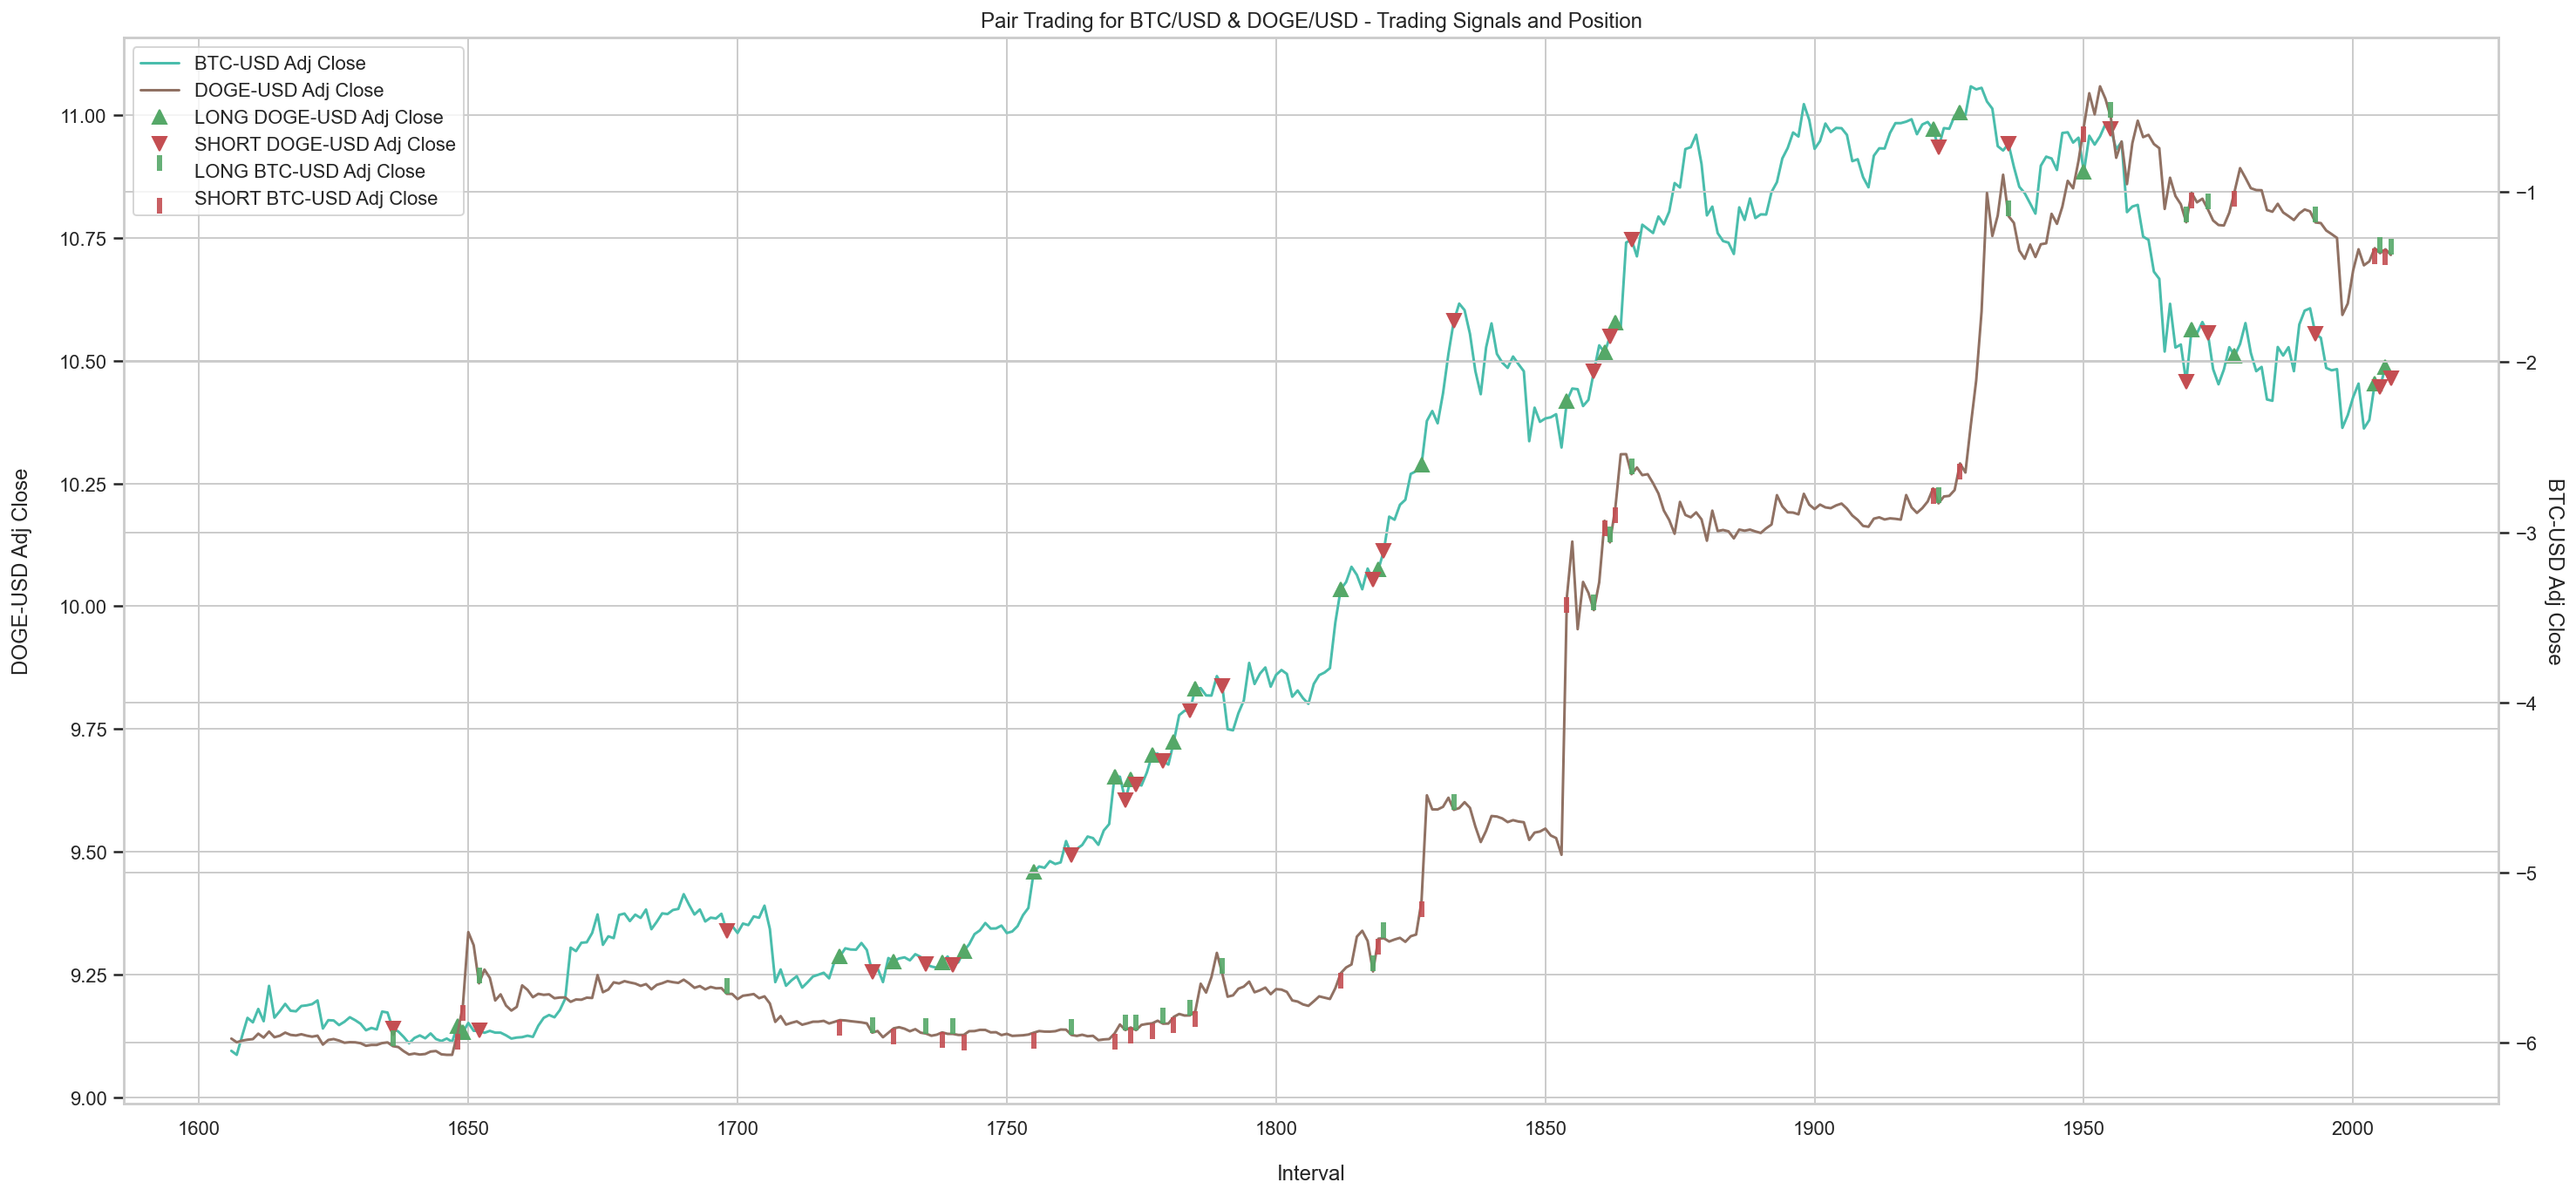

In [45]:
fig=plt.figure(figsize=(20.6,9.6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()


l1, = bx.plot(signals['BTC/USD'], c='#4abdac')
l2, = bx2.plot(signals['DOGE/USD'], c='#907163')

u1, = bx.plot(signals['BTC/USD'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=1)

d1, = bx.plot(signals['BTC/USD'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=1)

u2, = bx2.plot(signals['DOGE/USD'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['DOGE/USD'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(DOGE,)
bx2.set_ylabel(BTC, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Interval')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [BTC,DOGE,'LONG {}'.format(DOGE),
           'SHORT {}'.format(DOGE),
           'LONG {}'.format(BTC),
           'SHORT {}'.format(BTC)], loc ='best')

plt.title('Pair Trading for BTC/USD & DOGE/USD - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show('images/chart7');

## Portfolio Profit and Loss Calculation for Selected pair - 1 BTC/USD & DOGE/USD

### Initial capital to calculate the actual pnl. Shares to buy for each position

In [46]:
initial_capital = 5000

positions1 = initial_capital// max(signals['BTC/USD'])
positions2 = initial_capital// max(signals['DOGE/USD'])

### Since there are two assets, we calculate each asset Pnl separately and in the end we aggregate them into one portfolio

In [47]:
portfolio = pd.DataFrame()
portfolio['BTC/USD'] = signals['BTC/USD']
portfolio['BTC holdings'] = signals['positions1'].cumsum() * signals['BTC/USD'] * positions1
portfolio['BTC cash'] = initial_capital - (signals['positions1'] * signals['BTC/USD'] * positions1).cumsum()
portfolio['total BTC'] = portfolio['BTC holdings'] + portfolio['BTC cash']
portfolio['BTC return'] = portfolio['total BTC'].pct_change()
portfolio['positions1'] = signals['positions1']

### PnL for the 2nd asset

In [48]:
portfolio['DOGE/USD'] = signals['DOGE/USD']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['DOGE/USD'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['DOGE/USD'] * positions2).cumsum()
portfolio['total DOGE'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total DOGE'].pct_change()
portfolio['positions2'] = signals['positions2']

### Total PnL and z-score

In [49]:
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total DOGE'] + portfolio['total BTC']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

In [50]:
portfolio.round(3).head()

,BTC/USD,BTC holdings,BTC cash,total BTC,BTC return,positions1,DOGE/USD,holdings2,cash2,total DOGE,return2,positions2,z,total asset,z upper limit,z lower limit
1635,9.173,0.000,5000.000,5000.000,0.000,0.0,-5.998,0.000,5000.000,5000.000,0.000,0.0,0.277,10000.000,0.843,-2.002
1636,9.139,-4130.933,9130.933,5000.000,-0.000,-1.0,-6.020,79492.304,-74492.304,5000.000,0.000,1.0,1.374,10000.000,0.843,-2.002
1637,9.134,-4128.559,9130.933,5002.374,0.000,0.0,-6.025,79563.138,-74492.304,5070.834,0.014,0.0,1.607,10073.208,0.843,-2.002
1638,9.123,-4123.560,9130.933,5007.373,0.001,0.0,-6.050,79883.878,-74492.304,5391.574,0.063,0.0,2.168,10398.947,0.843,-2.002
1639,9.110,-4117.725,9130.933,5013.208,0.001,0.0,-6.069,80143.917,-74492.304,5651.612,0.048,0.0,2.423,10664.820,0.843,-2.002


In [51]:
portfolio.round(3).tail(13)

,BTC/USD,BTC holdings,BTC cash,total BTC,BTC return,positions1,DOGE/USD,holdings2,cash2,total DOGE,return2,positions2,z,total asset,z upper limit,z lower limit
1995,10.485,-4739.377,10024.256,5284.879,0.005,0.0,-1.226,16188.974,16966.180,33155.154,0.018,0.0,1.360,38440.033,0.843,-2.002
1996,10.481,-4737.207,10024.256,5287.049,0.000,0.0,-1.247,16467.076,16966.180,33433.256,0.008,0.0,1.452,38720.305,0.843,-2.002
1997,10.483,-4738.252,10024.256,5286.004,-0.000,0.0,-1.270,16767.135,16966.180,33733.315,0.009,0.0,1.491,39019.319,0.843,-2.002
1998,10.363,-4684.228,10024.256,5340.028,0.010,0.0,-1.722,22740.294,16966.180,39706.474,0.177,0.0,3.075,45046.502,0.843,-2.002
1999,10.389,-4695.905,10024.256,5328.351,-0.002,0.0,-1.655,21858.495,16966.180,38824.675,-0.022,0.0,2.466,44153.026,0.843,-2.002
2000,10.426,-4712.523,10024.256,5311.733,-0.003,0.0,-1.460,19282.841,16966.180,36249.021,-0.066,0.0,1.638,41560.754,0.843,-2.002
2001,10.453,-4724.942,10024.256,5299.314,-0.002,0.0,-1.336,17647.565,16966.180,34613.744,-0.045,0.0,1.052,39913.058,0.843,-2.002
2002,10.362,-4683.672,10024.256,5340.584,0.008,0.0,-1.431,18891.757,16966.180,35857.936,0.036,0.0,1.374,41198.520,0.843,-2.002
2003,10.379,-4691.442,10024.256,5332.814,-0.001,0.0,-1.407,18584.441,16966.180,35550.621,-0.009,0.0,1.195,40883.435,0.843,-2.002
2004,10.453,0.000,5299.481,5299.481,-0.006,1.0,-1.330,0.000,34530.191,34530.191,-0.029,-1.0,0.817,39829.672,0.843,-2.002


### Plot the asset value change of the portfolio and pnl along with z-score

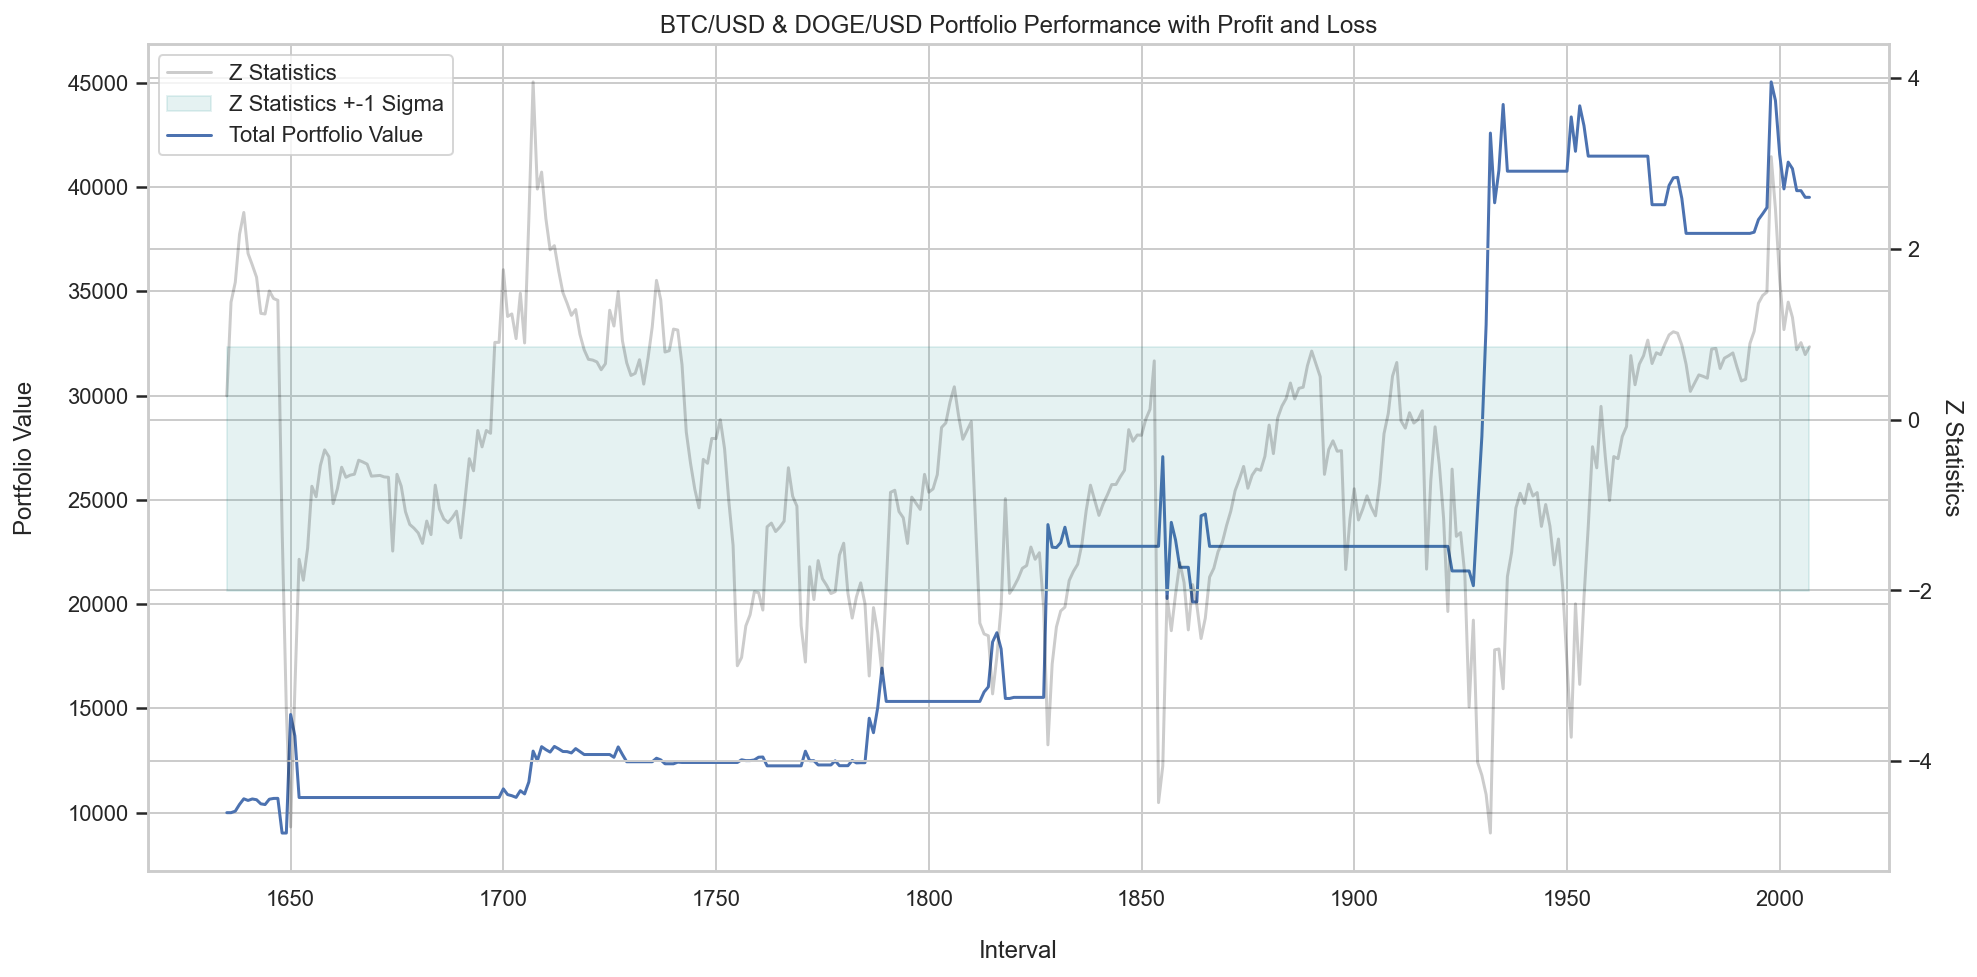

In [52]:
fig = plt.figure(figsize=(15.6,7.6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='b')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.2)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.1,color='teal')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Interval')
ax.xaxis.labelpad=15
plt.title('BTC/USD & DOGE/USD Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.show('images/chart8');

## Calculation of CAGR for pair BTC/USD & DOGE/USD

In [53]:
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

Number of days =  372


In [54]:
final_portfolio

39510.746404178215

In [55]:
YEAR_DAYS = 365
returns = (final_portfolio/10000) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 285.023%


# Cointegration test for the Selected Pair - 2 ETH/USD & DOGE/USD

###  Pairs to test strategy

In [56]:
DOGE =  'DOGE-USD Adj Close'
ETH = 'ETH-USD Adj Close'

### Create a train dataframe of 2 assets

In [57]:
train = pd.DataFrame()
train['ETH/USD'] = train_data[ETH]
train['DOGE/USD'] = train_data[DOGE]

### Visualising closing prices

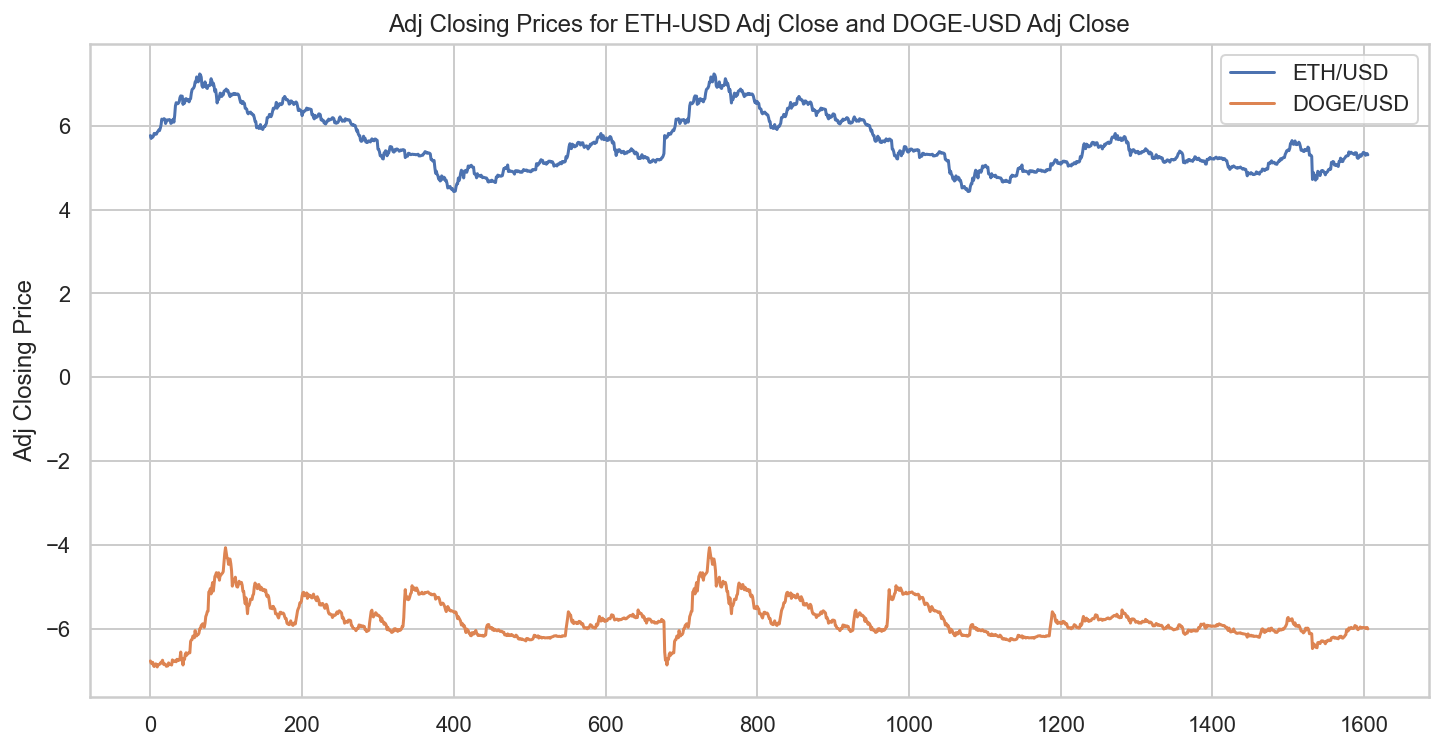

In [58]:
ax = train[['ETH/USD','DOGE/USD']].plot(figsize=(12, 6), title = 'Adj Closing Prices for {} and {}'.format(ETH,DOGE))
ax.set_ylabel("Adj Closing Price")
ax.grid(True);
plt.show('images/chart3')

## Johansen cointegration test

In [59]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
jres = coint_johansen(train,0,1)

In [60]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [61]:
joh_output(jres)

   max_eig_stat  trace_stat
0     23.902278   28.051729
1      4.149451    4.149451 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



### Run OLS regression

In [62]:
model= sm.OLS(train['ETH/USD'], train['DOGE/USD']).fit()

### Print regression summary results

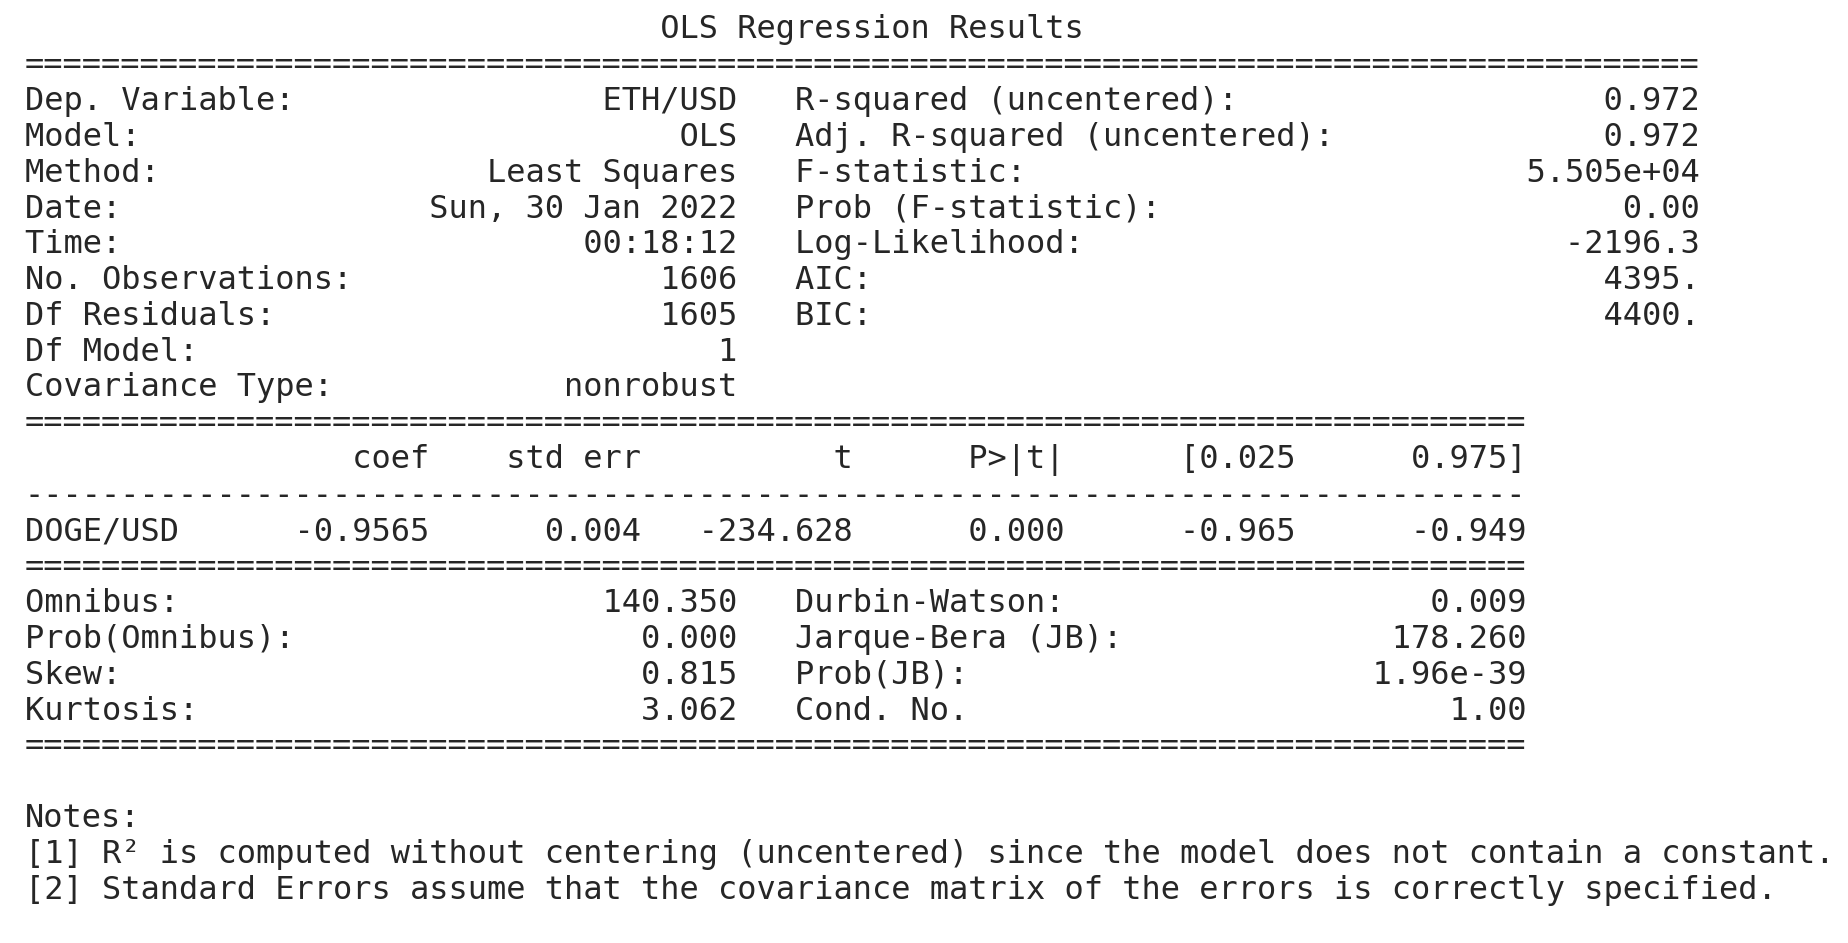

In [63]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.show('images/chart9');

In [64]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  -0.9565377347317485


### Calculate spread

In [65]:
spread = train['ETH/USD'] - model.params[0] * train['DOGE/USD']

### Plot the spread

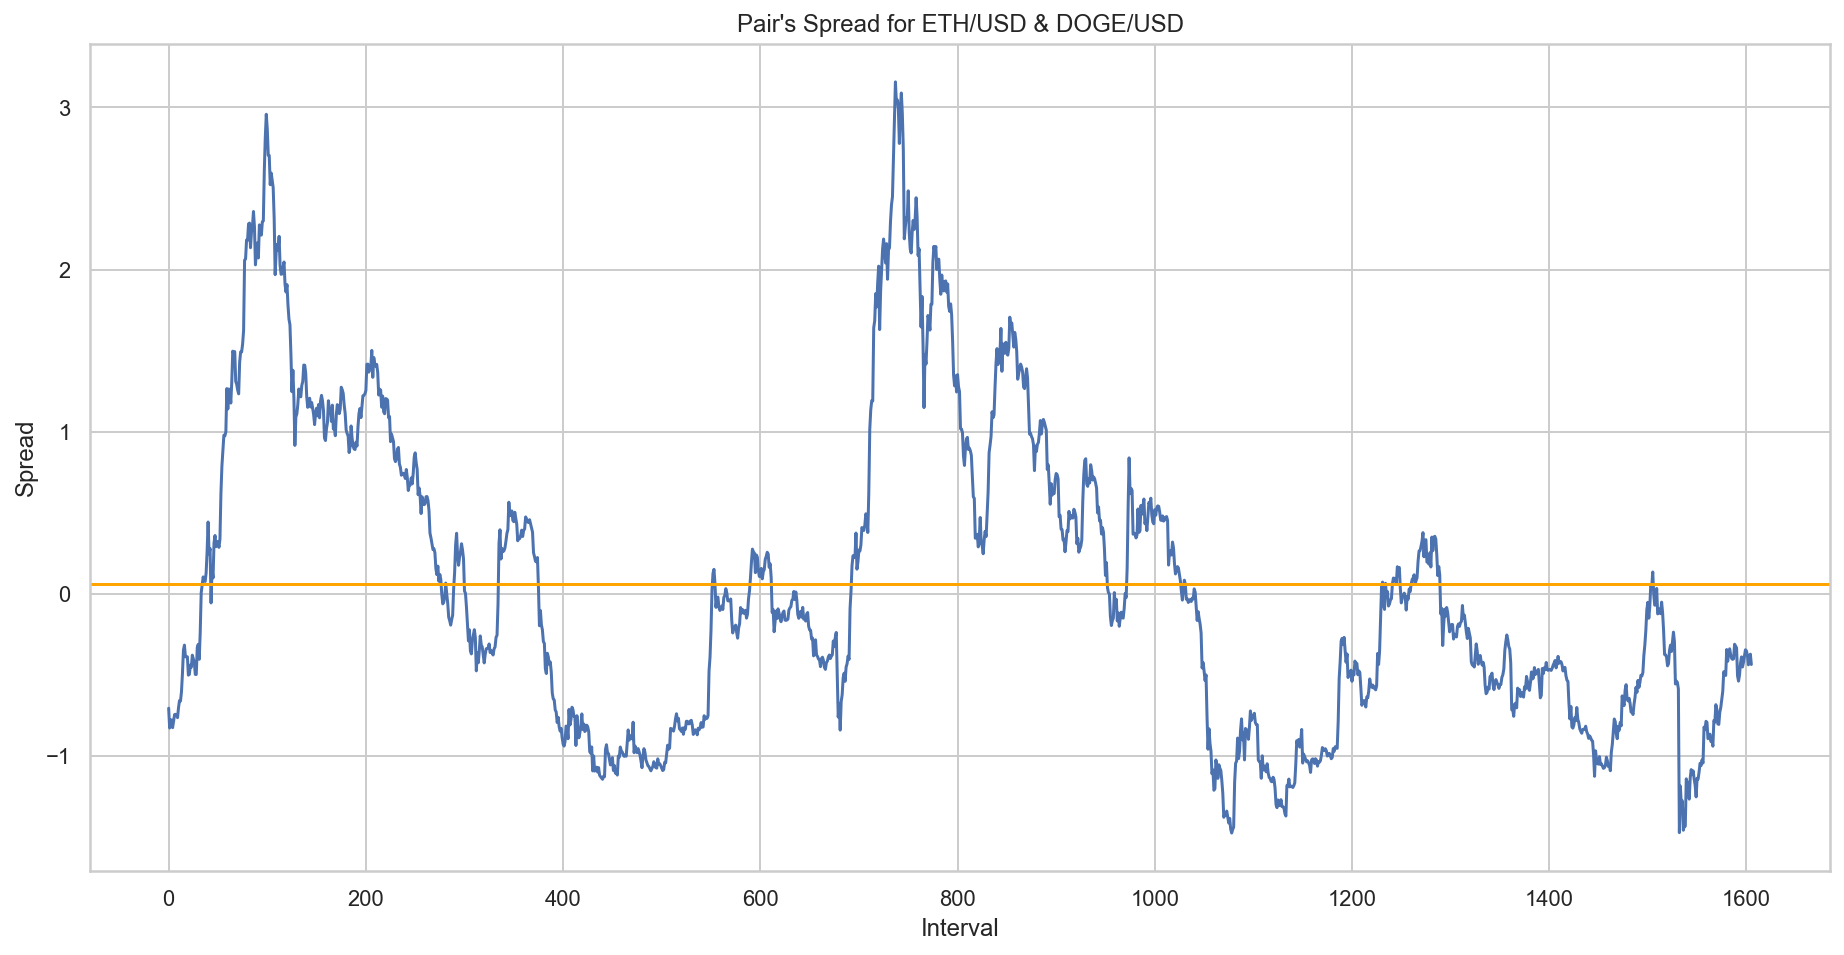

In [66]:
ax = spread.plot(figsize=(15.6, 7.6), title = "Pair's Spread for ETH/USD & DOGE/USD")
plt.axhline(spread.mean(),color='orange')
ax.set_ylabel("Spread")
ax.set_xlabel("Interval")
ax.grid(True);
plt.show('images/chart5');

## Generate Trading Signals using z-score ETH/USD & DOGE/USD

### Calculate z-score

In [67]:
def zscore(series):
    return (series - series.rolling(window = 30).mean()) / series.rolling(window=30).std()

### Create a dataframe for trading signals

In [68]:
signals = pd.DataFrame()
signals['ETH/USD'] = test_data[ETH] 
signals['DOGE/USD'] = test_data[DOGE]
ratios = signals['ETH/USD'] / signals['DOGE/USD']

### Calculate z-score and define upper and lower thresholds

In [69]:
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

### Creating signal - short if z-score is greater than upper limit else long

In [70]:
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

###  Taking the first order difference to obtain portfolio position in that stock

In [71]:
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

### Visualizing z-score and upper and lower thresholds

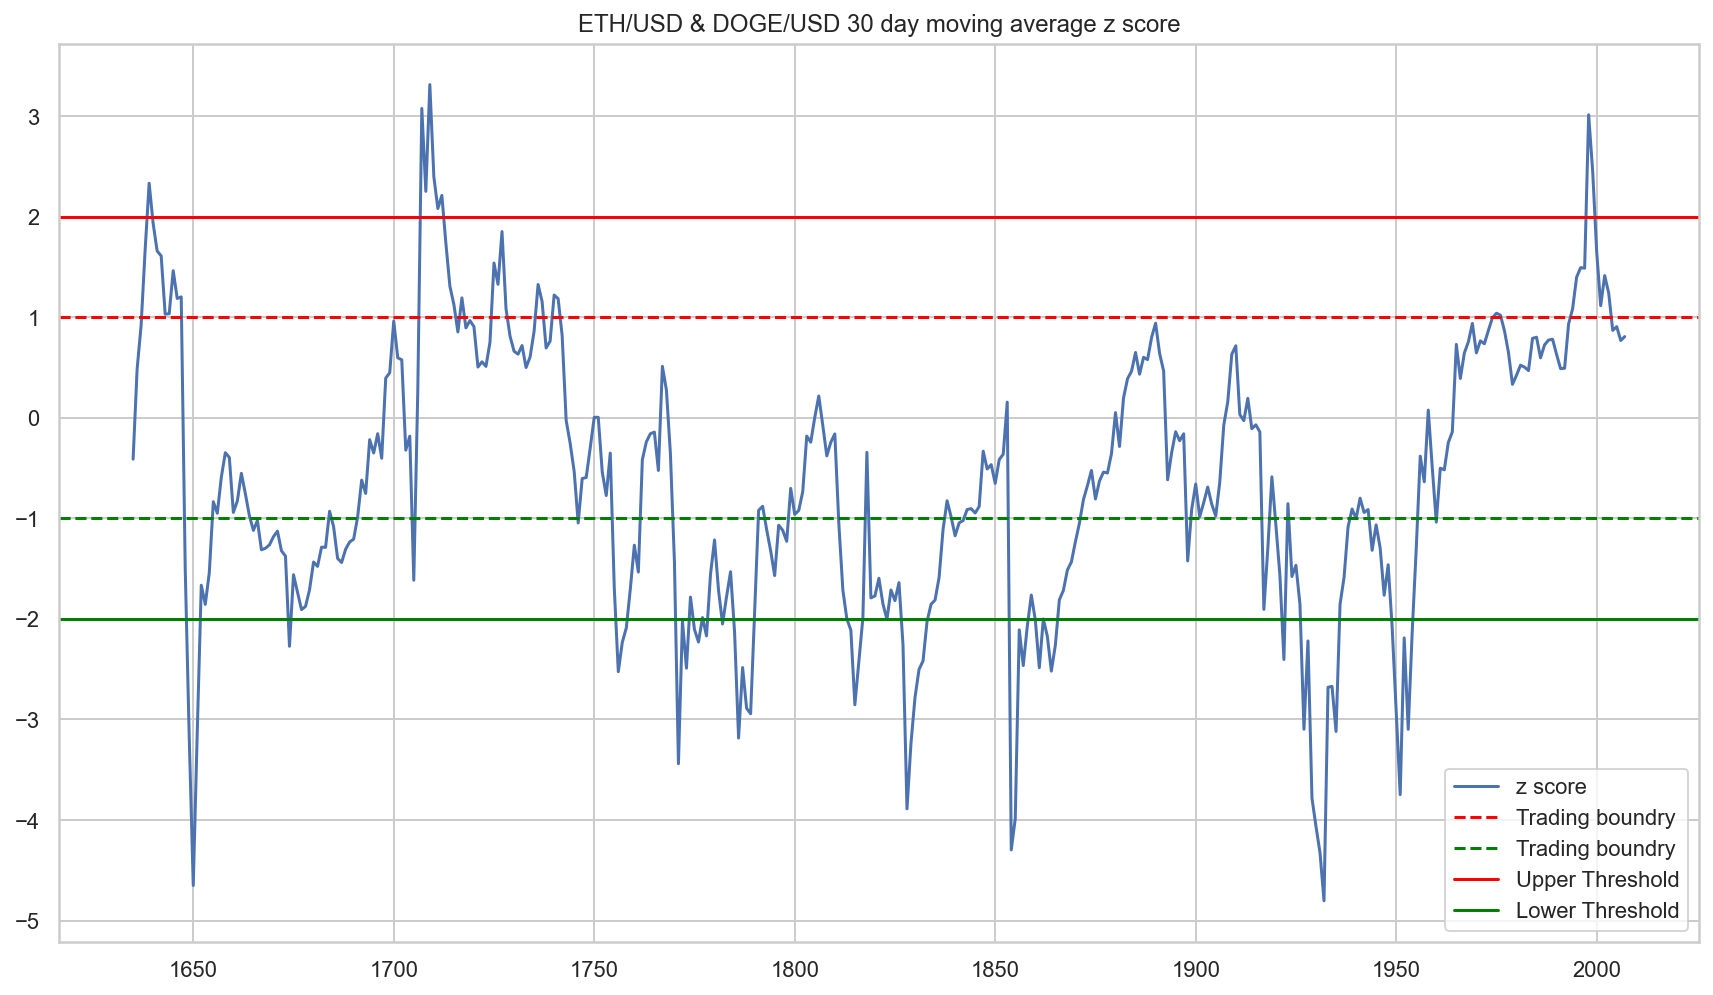

In [72]:
signals['z'].plot(label="z score ")
plt.title("ETH/USD & DOGE/USD 30 day moving average z score")
plt.axhline((1), color="red",linestyle = '--', label="Trading boundry")
plt.axhline((-1), color="green",linestyle ='--' , label="Trading boundry")
plt.axhline((2), color="red", label="Upper Threshold")
plt.axhline((-2), color="green",label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.show('images/chart6');

### Verifying dataframe head and tail

In [73]:
signals.head(10).append(signals.tail(10))

,ETH/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1606,5.324569,-5.975591,NaN,0.752976,-2.011671,0,NaN,0,NaN
1607,5.307784,-5.997080,NaN,0.752976,-2.011671,0,0.0,0,0.0
1608,5.341681,-5.987473,NaN,0.752976,-2.011671,0,0.0,0,0.0
1609,5.392902,-5.981910,NaN,0.752976,-2.011671,0,0.0,0,0.0
1610,5.396692,-5.978746,NaN,0.752976,-2.011671,0,0.0,0,0.0
1611,5.490365,-5.946491,NaN,0.752976,-2.011671,0,0.0,0,0.0
1612,5.442313,-5.969703,NaN,0.752976,-2.011671,0,0.0,0,0.0
1613,5.509355,-5.934328,NaN,0.752976,-2.011671,0,0.0,0,0.0
1614,5.468984,-5.967357,NaN,0.752976,-2.011671,0,0.0,0,0.0
1615,5.497903,-5.958804,NaN,0.752976,-2.011671,0,0.0,0,0.0


### Checking portfolio position

In [74]:
signals[signals.signals1 != 0].head()

,ETH/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1637,5.450800,-6.025228,0.920953,0.752976,-2.011671,-1,-1.0,1,1.0
1638,5.436635,-6.049517,1.668696,0.752976,-2.011671,-1,0.0,1,0.0
1639,5.406991,-6.069210,2.331767,0.752976,-2.011671,-1,0.0,1,0.0
1640,5.417642,-6.063605,1.930546,0.752976,-2.011671,-1,0.0,1,0.0
1641,5.430200,-6.069210,1.657883,0.752976,-2.011671,-1,0.0,1,0.0


In [75]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

,ETH/USD,DOGE/USD,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
1606,5.324569,-5.975591,NaN,0.752976,-2.011671,0,NaN,0,NaN
1637,5.450800,-6.025228,0.920953,0.752976,-2.011671,-1,-1.0,1,1.0
1648,5.486912,-5.946109,-1.508122,0.752976,-2.011671,0,1.0,0,-1.0
1649,5.476780,-5.779584,-3.184662,0.752976,-2.011671,1,1.0,-1,-1.0
1652,5.484735,-5.650716,-1.665180,0.752976,-2.011671,0,-1.0,0,1.0
1984,7.859515,-1.105486,0.789077,0.752976,-2.011671,-1,-1.0,1,1.0
1986,7.866441,-1.069060,0.595428,0.752976,-2.011671,0,1.0,0,-1.0
1988,7.763773,-1.141439,0.772166,0.752976,-2.011671,-1,-1.0,1,1.0
1990,7.827397,-1.125833,0.629741,0.752976,-2.011671,0,1.0,0,-1.0
1993,7.769659,-1.178432,0.933394,0.752976,-2.011671,-1,-1.0,1,1.0


In [76]:
signals.loc[signals['positions1'] == 1].index
signals['DOGE/USD'][signals['positions1'] == 1].value_counts()

-5.895064    1
-5.946109    1
-1.004679    1
-5.870664    1
-2.594958    1
-2.976243    1
-5.602400    1
-5.830707    1
-5.539880    1
-1.039326    1
-5.169924    1
-2.741741    1
-5.931311    1
-1.069060    1
-3.378927    1
-0.994044    1
-5.892525    1
-5.779584    1
-5.932064    1
-2.854320    1
-1.125833    1
-5.723577    1
-5.814491    1
-5.873148    1
-5.908595    1
-2.932025    1
-5.938872    1
-0.817109    1
Name: DOGE/USD, dtype: int64

### Visualizing trading signals and position & plot two different assets

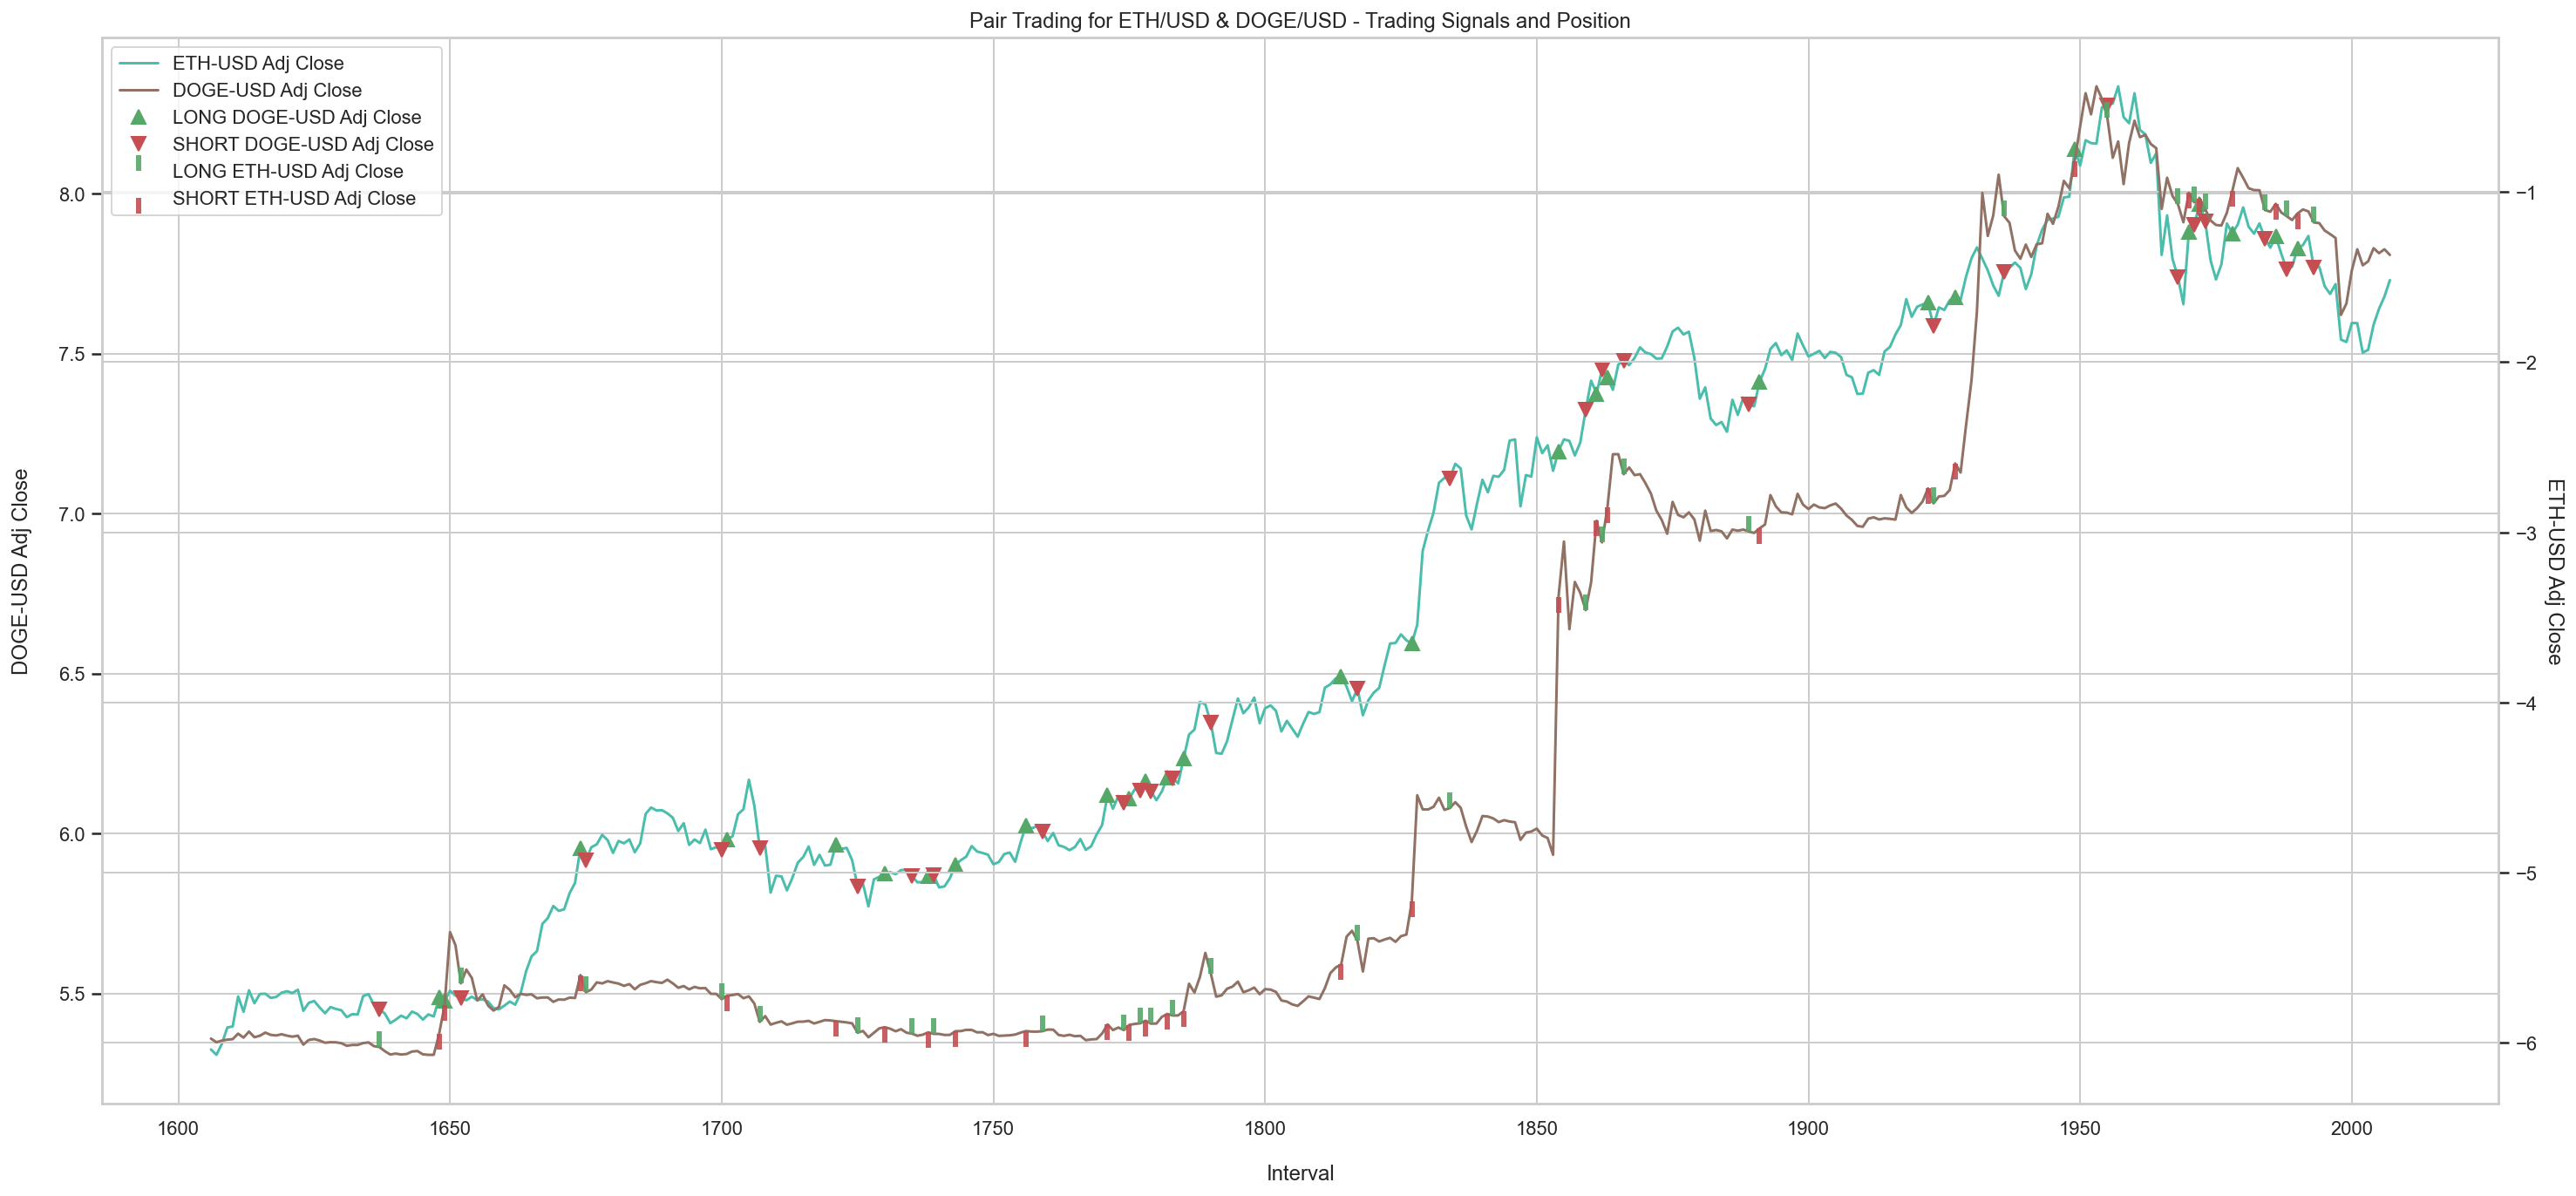

In [77]:
fig=plt.figure(figsize=(20.6,9.6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()


l1, = bx.plot(signals['ETH/USD'], c='#4abdac')
l2, = bx2.plot(signals['DOGE/USD'], c='#907163')

u1, = bx.plot(signals['ETH/USD'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=1)

d1, = bx.plot(signals['ETH/USD'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=1)

u2, = bx2.plot(signals['DOGE/USD'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['DOGE/USD'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(DOGE,)
bx2.set_ylabel(ETH, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Interval')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [ETH,DOGE,'LONG {}'.format(DOGE),
           'SHORT {}'.format(DOGE),
           'LONG {}'.format(ETH),
           'SHORT {}'.format(ETH)], loc ='best')

plt.title('Pair Trading for ETH/USD & DOGE/USD - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show('images/chart7');

## Portfolio Profit and Loss Calculation for Selected pair - 2 ETH/USD & DOGE/USD

### Initial capital to calculate the actual pnl. Shares to buy for each position

In [78]:
initial_capital = 5000

positions1 = initial_capital// max(signals['ETH/USD'])
positions2 = initial_capital// max(signals['DOGE/USD'])

### Since there are two assets, we calculate each asset Pnl separately and in the end we aggregate them into one portfolio

In [79]:
portfolio = pd.DataFrame()
portfolio['ETH/USD'] = signals['ETH/USD']
portfolio['ETH holdings'] = signals['positions1'].cumsum() * signals['ETH/USD'] * positions1
portfolio['ETH cash'] = initial_capital - (signals['positions1'] * signals['ETH/USD'] * positions1).cumsum()
portfolio['total ETH'] = portfolio['ETH holdings'] + portfolio['ETH cash']
portfolio['ETH return'] = portfolio['total ETH'].pct_change()
portfolio['positions1'] = signals['positions1']

### PnL for the 2nd asset

In [80]:
portfolio['DOGE/USD'] = signals['DOGE/USD']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['DOGE/USD'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['DOGE/USD'] * positions2).cumsum()
portfolio['total DOGE'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total DOGE'].pct_change()
portfolio['positions2'] = signals['positions2']

### Total PnL and z-score

In [81]:
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total DOGE'] + portfolio['total ETH']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

In [82]:
portfolio.round(3).head()

,ETH/USD,ETH holdings,ETH cash,total ETH,ETH return,positions1,DOGE/USD,holdings2,cash2,total DOGE,return2,positions2,z,total asset,z upper limit,z lower limit
1635,5.498,0.000,5000.000,5000.000,0.000,0.0,-5.998,0.000,5000.000,5000.000,0.000,0.0,-0.412,10000.000,0.753,-2.012
1636,5.463,0.000,5000.000,5000.000,0.000,0.0,-6.020,0.000,5000.000,5000.000,0.000,0.0,0.483,10000.000,0.753,-2.012
1637,5.451,-3265.029,8265.029,5000.000,0.000,-1.0,-6.025,79563.138,-74563.138,5000.000,0.000,1.0,0.921,10000.000,0.753,-2.012
1638,5.437,-3256.544,8265.029,5008.485,0.002,0.0,-6.050,79883.878,-74563.138,5320.740,0.064,0.0,1.669,10329.225,0.753,-2.012
1639,5.407,-3238.788,8265.029,5026.241,0.004,0.0,-6.069,80143.917,-74563.138,5580.779,0.049,0.0,2.332,10607.020,0.753,-2.012


In [83]:
portfolio.round(3).tail(13)

,ETH/USD,ETH holdings,ETH cash,total ETH,ETH return,positions1,DOGE/USD,holdings2,cash2,total DOGE,return2,positions2,z,total asset,z upper limit,z lower limit
1995,7.711,-4618.610,9923.364,5304.754,0.007,0.0,-1.226,16188.974,16850.05,33039.024,0.018,0.0,1.398,38343.778,0.753,-2.012
1996,7.686,-4604.148,9923.364,5319.215,0.003,0.0,-1.247,16467.076,16850.05,33317.126,0.008,0.0,1.492,38636.342,0.753,-2.012
1997,7.717,-4622.524,9923.364,5300.840,-0.003,0.0,-1.270,16767.135,16850.05,33617.185,0.009,0.0,1.487,38918.025,0.753,-2.012
1998,7.544,-4518.563,9923.364,5404.801,0.020,0.0,-1.722,22740.294,16850.05,39590.344,0.178,0.0,3.013,44995.145,0.753,-2.012
1999,7.536,-4514.266,9923.364,5409.098,0.001,0.0,-1.655,21858.495,16850.05,38708.545,-0.022,0.0,2.453,44117.643,0.753,-2.012
2000,7.596,-4549.859,9923.364,5373.505,-0.007,0.0,-1.460,19282.841,16850.05,36132.891,-0.067,0.0,1.653,41506.397,0.753,-2.012
2001,7.595,-4549.473,9923.364,5373.891,0.000,0.0,-1.336,17647.565,16850.05,34497.615,-0.045,0.0,1.114,39871.505,0.753,-2.012
2002,7.503,-4494.212,9923.364,5429.152,0.010,0.0,-1.431,18891.757,16850.05,35741.807,0.036,0.0,1.413,41170.958,0.753,-2.012
2003,7.512,-4499.482,9923.364,5423.882,-0.001,0.0,-1.407,18584.441,16850.05,35434.491,-0.009,0.0,1.239,40858.373,0.753,-2.012
2004,7.590,-4546.586,9923.364,5376.778,-0.009,0.0,-1.330,17564.011,16850.05,34414.061,-0.029,0.0,0.868,39790.839,0.753,-2.012


### Plot the asset value change of the portfolio and pnl along with z-score

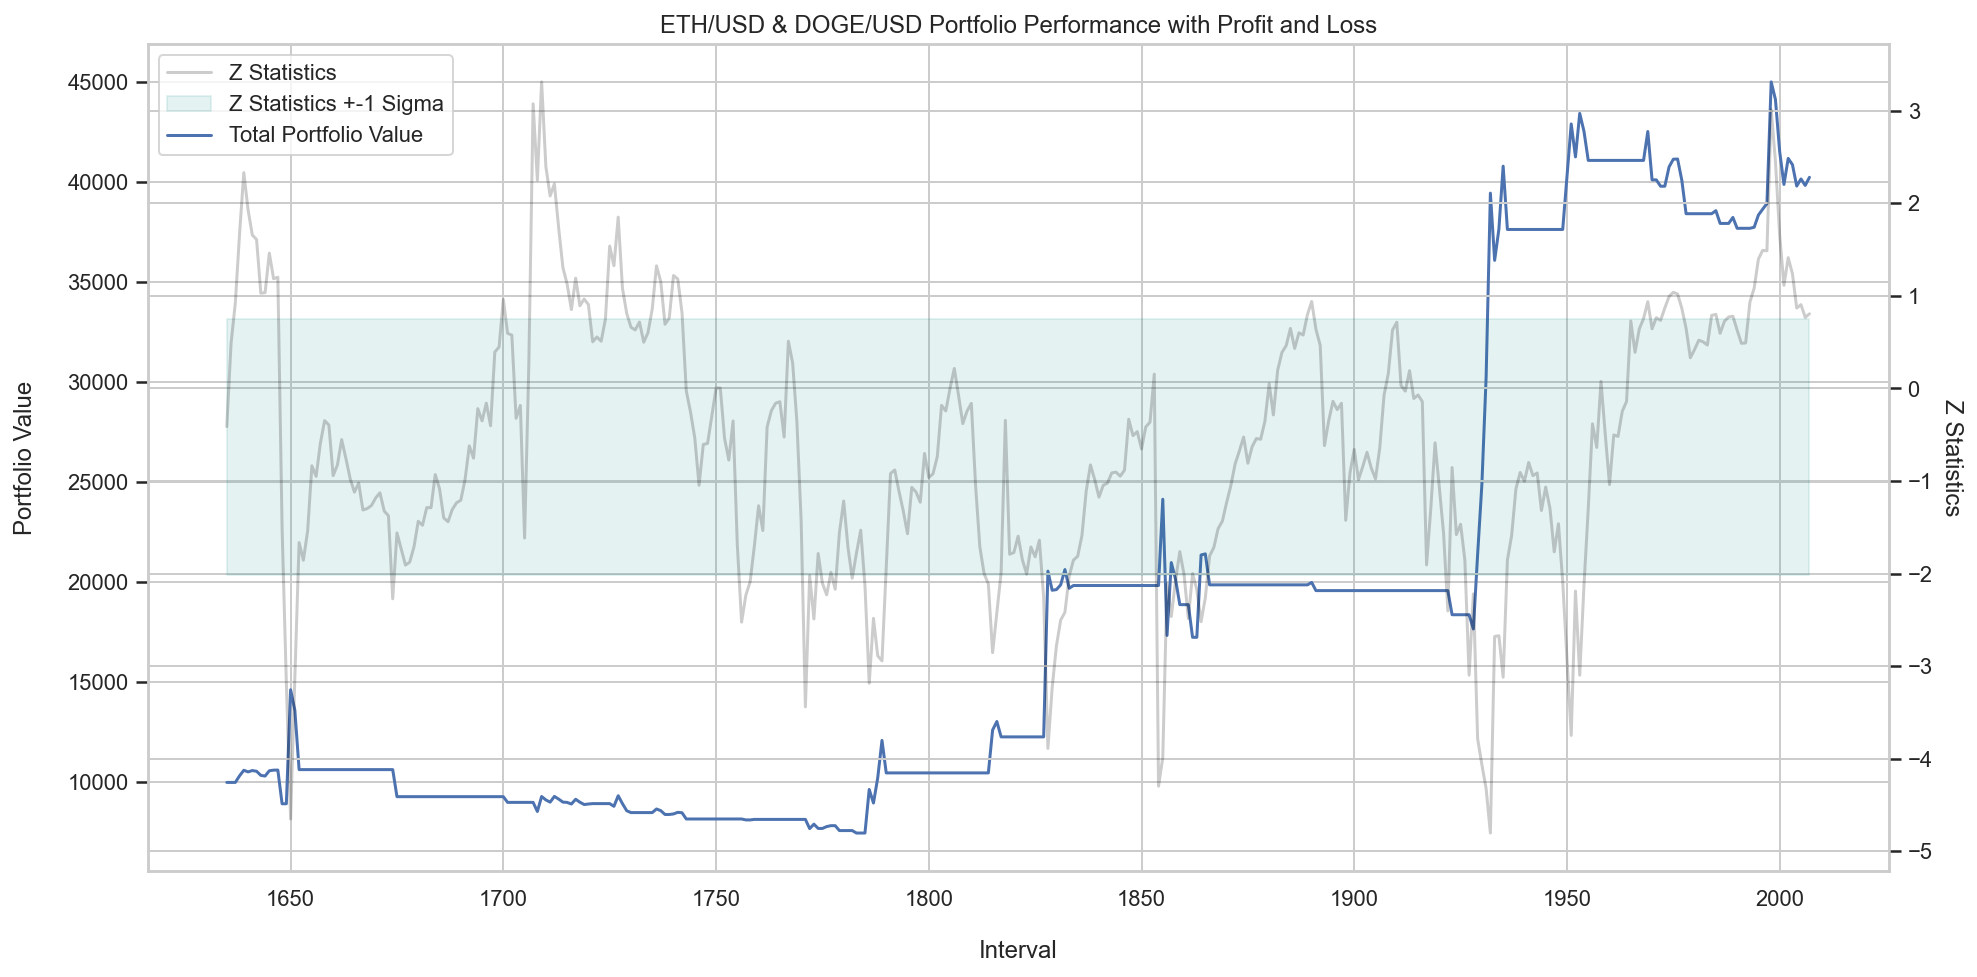

In [84]:
fig = plt.figure(figsize=(15.6,7.6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='b')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.2)

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.1,color='teal')

ax.set_ylabel('Portfolio Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Interval')
ax.xaxis.labelpad=15
plt.title('ETH/USD & DOGE/USD Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');
plt.show('images/chart8');

### Calculation of CAGR for pair ETH/USD & DOGE/USD

In [85]:
final_portfolio = portfolio['total asset'].iloc[-1]
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

Number of days =  372


In [86]:
final_portfolio

40228.65821701306

In [87]:
YEAR_DAYS = 365
returns = (final_portfolio/10000) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 291.886%


# Stationarity Test for Individual Crytocurrencies

### BTC-USD

In [88]:
BTC = df[['BTC-USD Adj Close']]
BTClog = np.log(BTC)
BTClog

,BTC-USD Adj Close
0,6.073814
1,6.071749
2,6.063811
3,6.070948
4,6.068333
...,...
2003,10.379295
2004,10.453043
2005,10.446809
2006,10.487595


Text(0.5, 1.0, 'BTC-USD Adj Close')

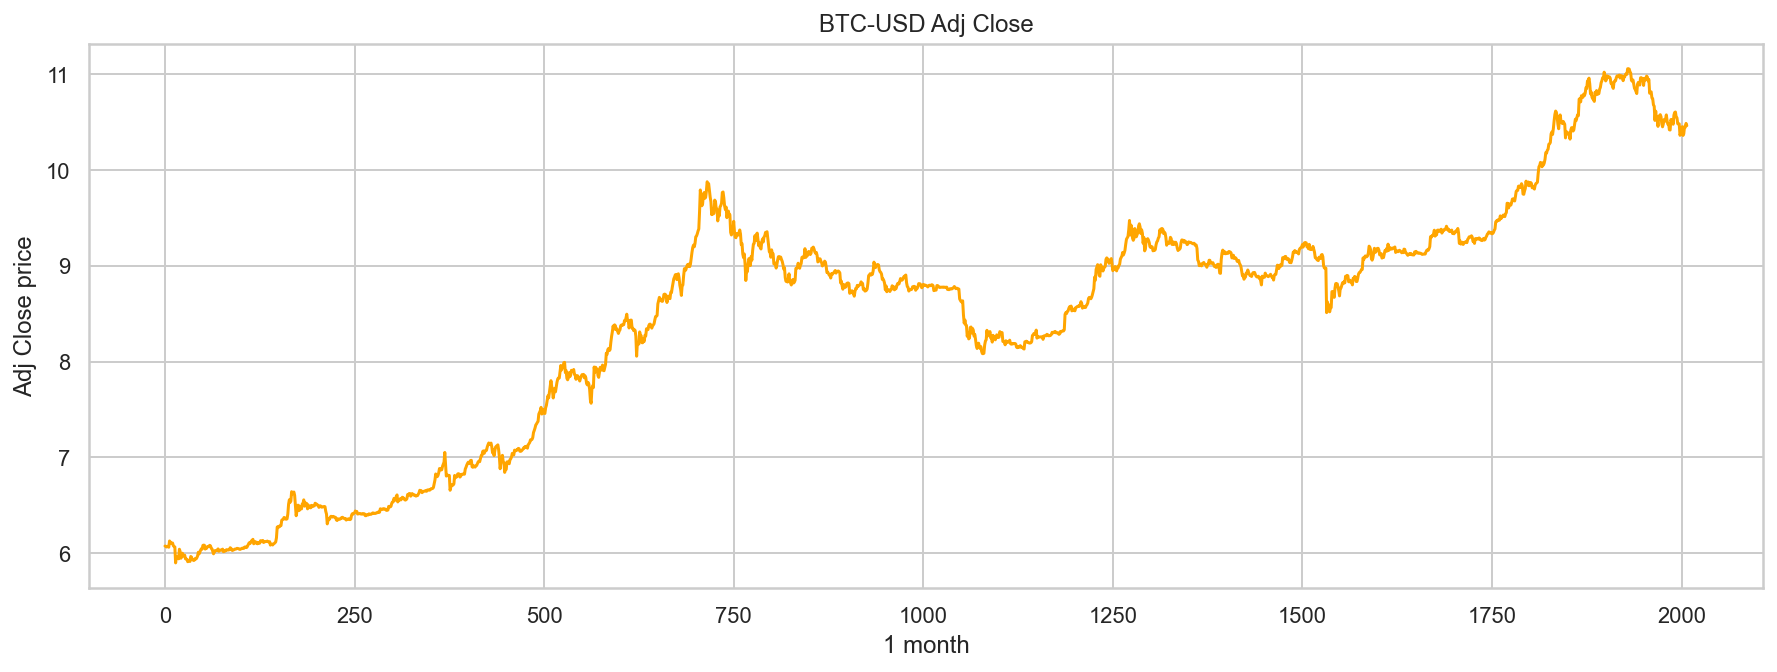

In [89]:
BTClog['BTC-USD Adj Close'].plot(figsize=(15,5),color='orange')
plt.xlabel("1 month")
plt.ylabel("Adj Close price")
plt.title("BTC-USD Adj Close")

### Augmented Dickey- Fuller Test  on BTC/USD 

In [90]:
X = BTClog["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Unit Root")
else:
    print("Failed to Reject Ho - No Unit Root")
    

ADF Statistic: -1.056449
p-value: 0.732124
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - No Unit Root


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [91]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTClog['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

 KPSS Statistics:0.8332747826153145
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### First Difference on BTC/USD

In [92]:
BTC_stationary = BTClog.diff().dropna()
BTC_stationary

,BTC-USD Adj Close
1,-0.002065
2,-0.007938
3,0.007137
4,-0.002615
5,-0.006631
...,...
2003,0.017188
2004,0.073747
2005,-0.006233
2006,0.040785


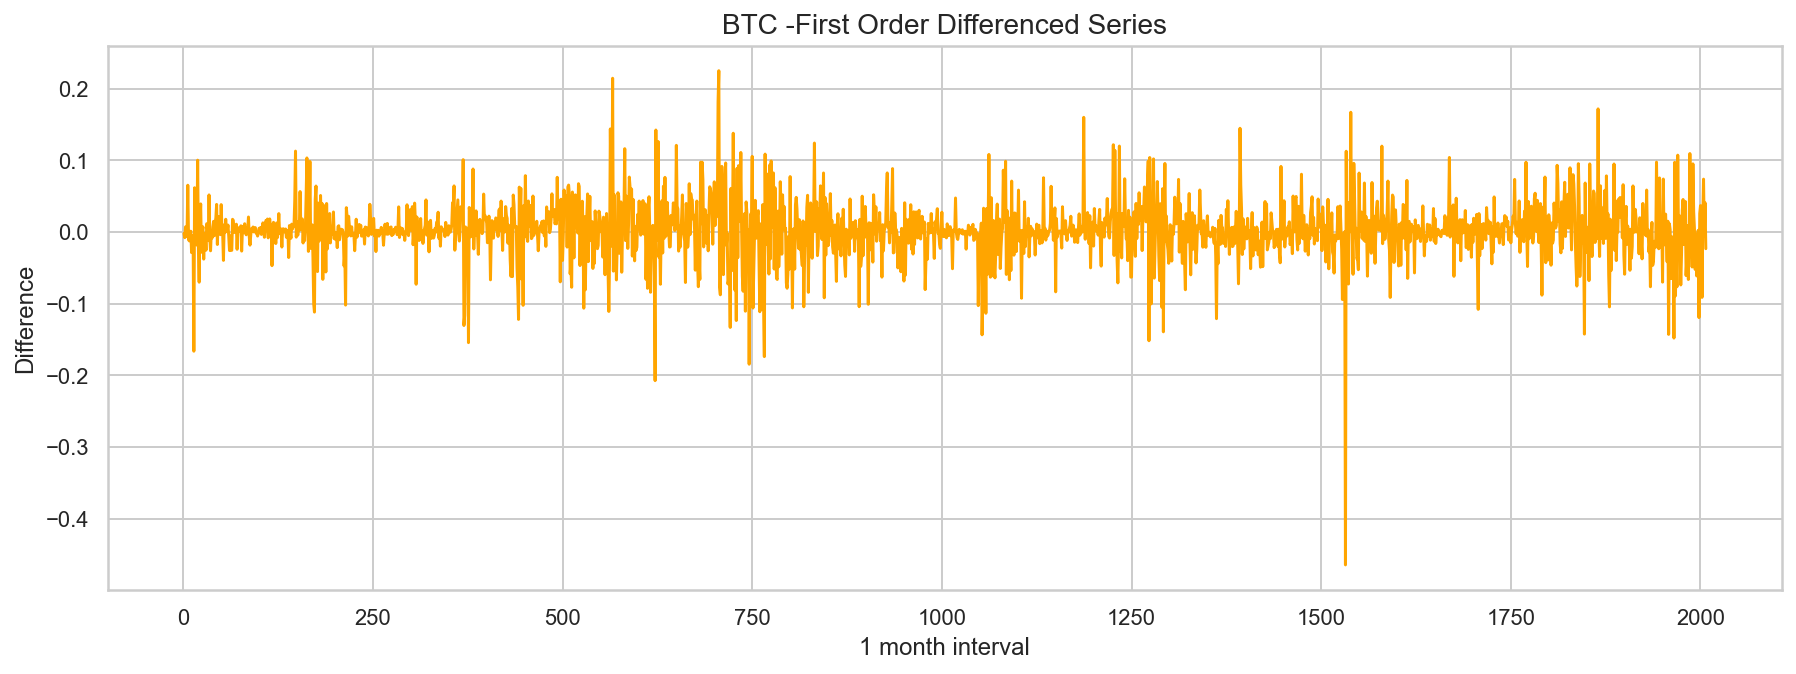

In [93]:
plt.figure(figsize=(15, 5))
plt.plot(BTC_stationary, color = 'orange')
plt.title('BTC -First Order Differenced Series', fontsize=14)
plt.xlabel('1 month interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### Augmented Dickey-Fuller Test after first difference

In [94]:
X = BTC_stationary["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -31.025474
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


  ### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after first difference 

In [95]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTC_stationary['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.08551244636705455
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series is stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## LTC-USD

In [96]:
LTC = df[['LTC-USD Adj Close']]
LTClog = np.log(LTC)
LTClog

,LTC-USD Adj Close
0,1.255325
1,1.253380
2,1.247914
3,1.251445
4,1.244059
...,...
2003,4.841485
2004,4.885434
2005,4.922684
2006,4.967748


Text(0.5, 1.0, 'LTC-USD Adj Close')

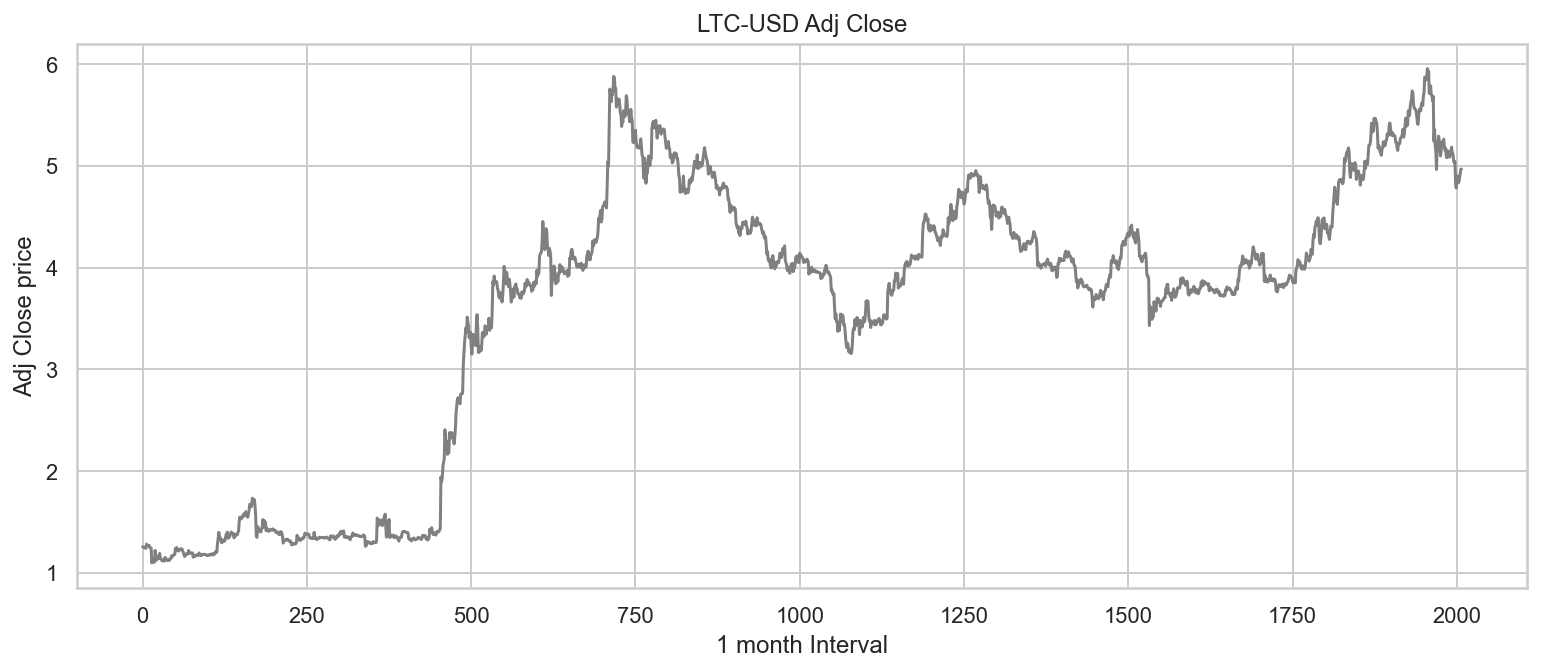

In [97]:
LTClog['LTC-USD Adj Close'].plot(figsize=(13,5),color = 'grey')
plt.xlabel("1 month Interval")
plt.ylabel("Adj Close price")
plt.title("LTC-USD Adj Close")

### Augmented Dickey-Fuller Test on LTC/USD 

In [98]:
X = LTClog["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -1.495628
p-value: 0.535673
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [99]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTClog['LTC-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(LTC)

 KPSS Statistics:1.0676639471346194
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### First Difference on LTC/USD

In [100]:
LTC_stationary = LTClog.diff().dropna()
LTC_stationary

,LTC-USD Adj Close
1,-0.001945
2,-0.005466
3,0.003531
4,-0.007385
5,-0.004654
...,...
2003,0.007684
2004,0.043949
2005,0.037250
2006,0.045064


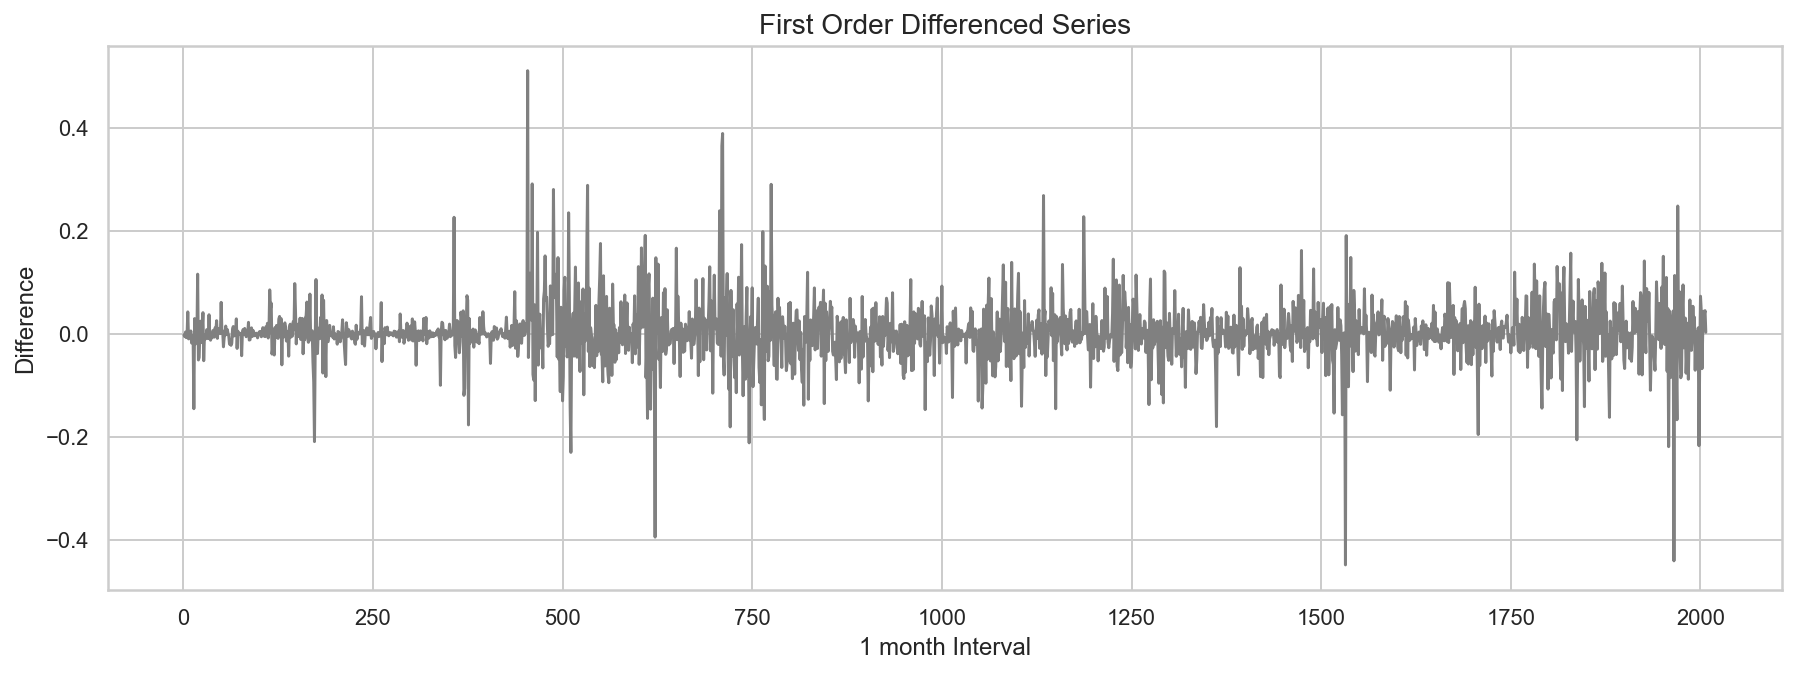

In [101]:
plt.figure(figsize=(15, 5))
plt.plot(LTC_stationary, color = 'grey')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('1 month Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### Augmented Dickey-Fuller Test after first difference

In [102]:
X = LTC_stationary["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -15.445585
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after first difference 

In [103]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTC_stationary['LTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
        
kpss_test(LTC_stationary)

 KPSS Statistics:0.08724155309296645
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## ETH-USD

In [104]:
ETH = df[['ETH-USD Adj Close']]
ETHlog = np.log(ETH)
ETHlog

,ETH-USD Adj Close
0,5.771080
1,5.701289
2,5.751559
3,5.729801
4,5.758005
...,...
2003,7.511655
2004,7.590294
2005,7.639958
2006,7.678219


Text(0.5, 1.0, 'ETH-USD Adj Close')

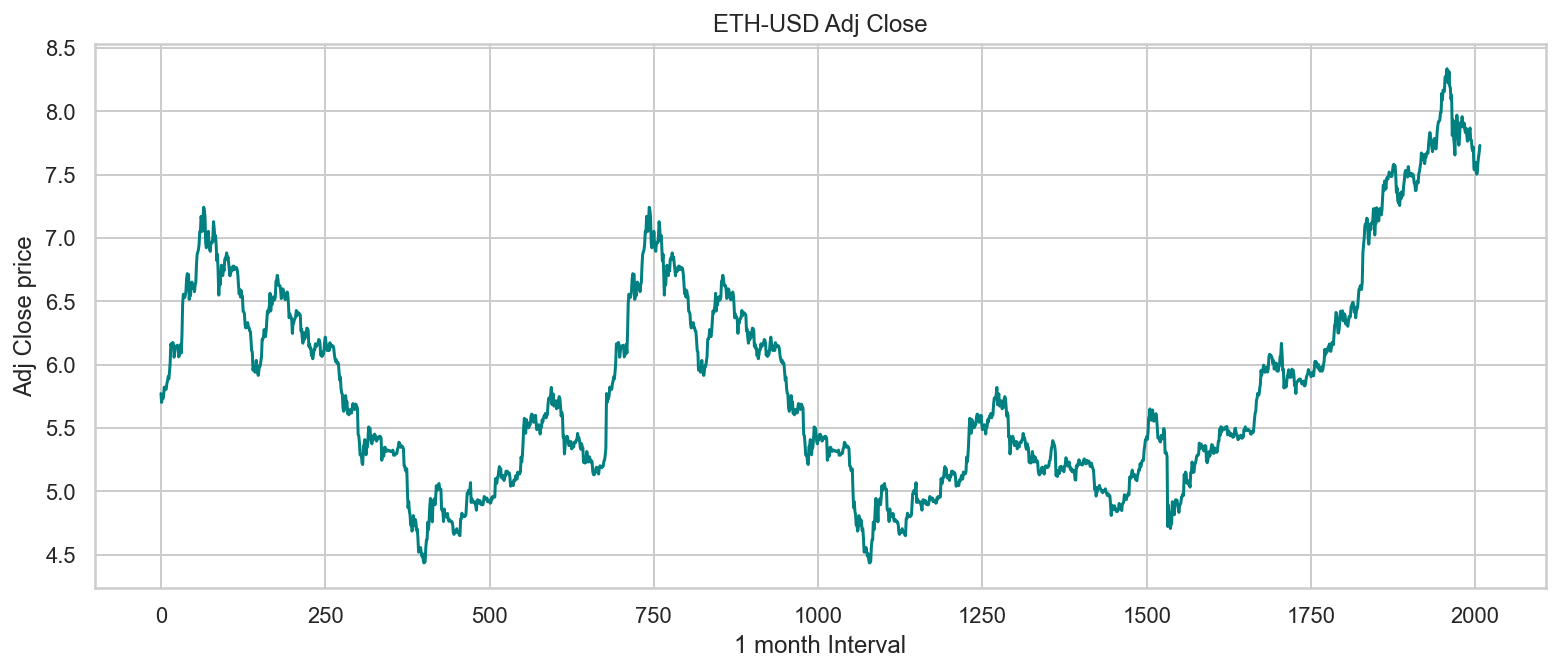

In [105]:
ETHlog['ETH-USD Adj Close'].plot(figsize=(13,5), color = 'teal')
plt.xlabel("1 month Interval")
plt.ylabel("Adj Close price")
plt.title("ETH-USD Adj Close")

### Augmented Dickey- Fuller Test on ETH/USD 

In [106]:
#Augmented Dickey-Filler Test - 
X = ETHlog["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.909187
p-value: 0.784932
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [107]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETHlog['ETH-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
         print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
kpss_test(ETH)

 KPSS Statistics:0.7641464633690934
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### First Difference on ETH/USD

In [108]:
ETH_stationary = ETHlog.diff().dropna()
ETH_stationary

,ETH-USD Adj Close
1,-0.069790
2,0.050270
3,-0.021758
4,0.028204
5,0.063948
...,...
2003,0.008797
2004,0.078638
2005,0.049665
2006,0.038261


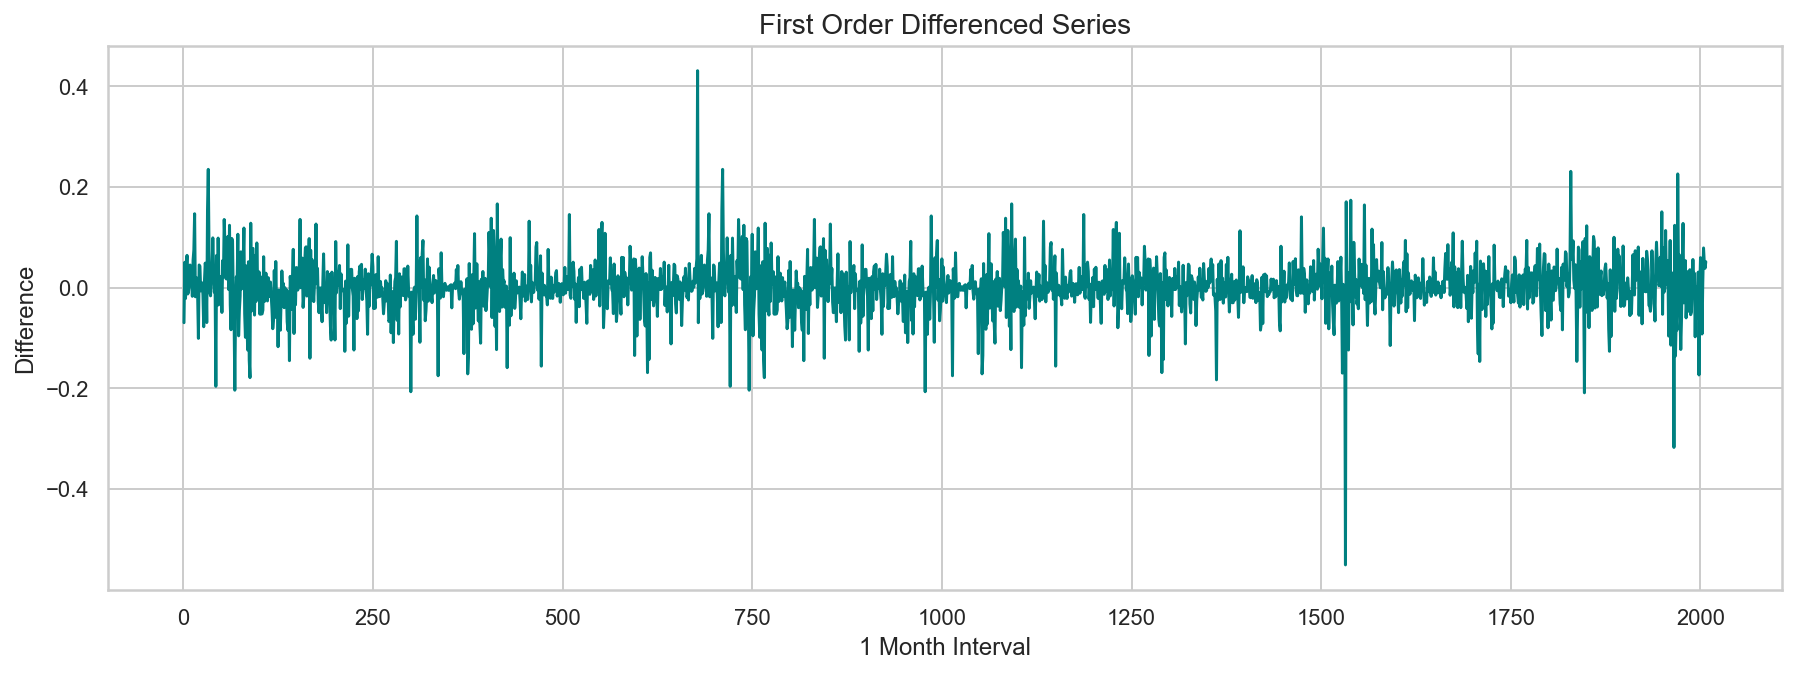

In [109]:
plt.figure(figsize=(15, 5))
plt.plot(ETH_stationary, color = 'teal')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('1 Month Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### Augmented Dickey-Filler Test after first difference

In [110]:
X = ETH_stationary["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series is stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -13.243861
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series is stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [111]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETH_stationary['ETH-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
        
kpss_test(ETH_stationary)

 KPSS Statistics:0.07473552718537016
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series is stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## DOGE-USD

In [112]:
DOGE = df[['DOGE-USD Adj Close']]
DOGElog = np.log(DOGE)
DOGElog

,DOGE-USD Adj Close
0,-6.772351
1,-6.827097
2,-6.826175
3,-6.805199
4,-6.884039
...,...
2003,-1.407379
2004,-1.330103
2005,-1.359236
2006,-1.336480


Text(0.5, 1.0, 'DOGE-USD Adj Close')

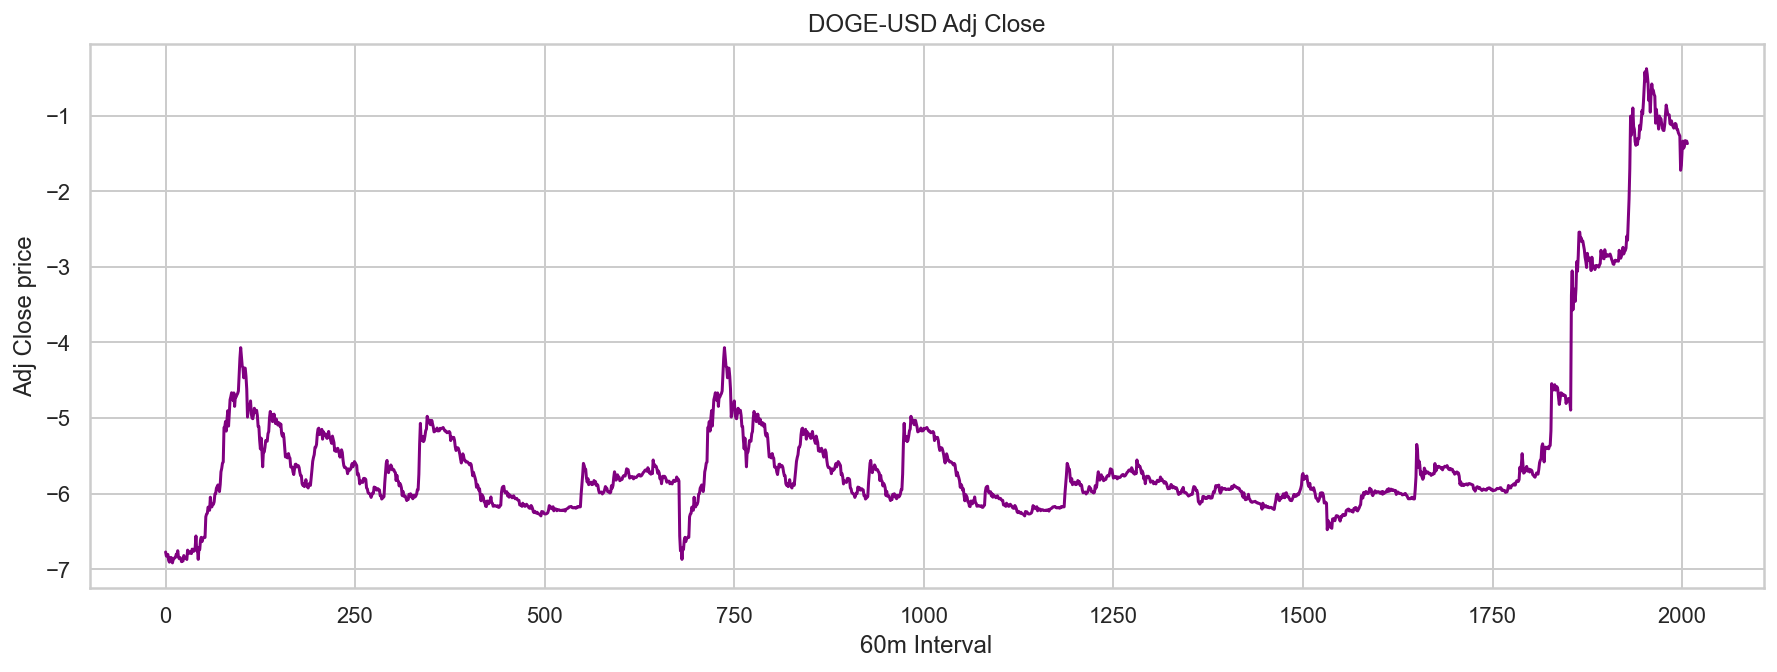

In [113]:
DOGElog['DOGE-USD Adj Close'].plot(figsize=(15,5),color = 'purple')
plt.xlabel("60m Interval")
plt.ylabel("Adj Close price")
plt.title("DOGE-USD Adj Close")

### Augmented Dickey Fuller Test on DOGE/USD

In [114]:
X = DOGElog["DOGE-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.637483
p-value: 0.862285
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) 

In [115]:
def kpss_test(DOGE):
    statistic , p_value , n_lags, critical_values = kpss(DOGElog['DOGE-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

 KPSS Statistics:0.6653254521211663
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### First Difference on DOGE-USD

In [116]:
DOGE_stationary = DOGElog.diff().dropna()
DOGE_stationary

,DOGE-USD Adj Close
1,-0.054747
2,0.000922
3,0.020977
4,-0.078840
5,-0.022717
...,...
2003,0.023273
2004,0.077276
2005,-0.029133
2006,0.022756


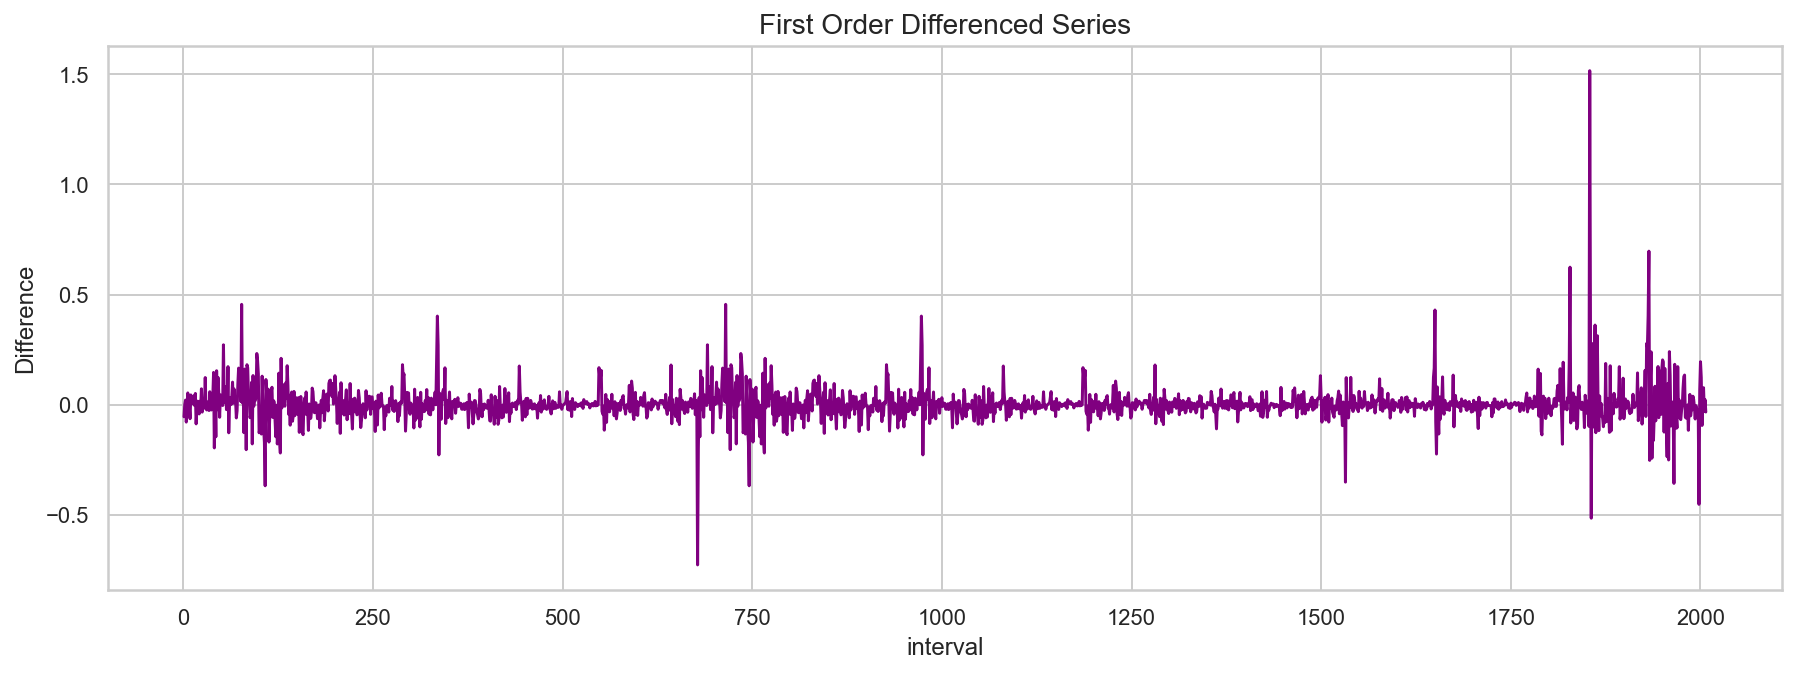

In [117]:
plt.figure(figsize=(15, 5))
plt.plot(DOGE_stationary, color = 'purple')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### Augmented Dickey-Fuller Test after first difference

In [118]:
X = DOGE_stationary["DOGE-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.727942
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after first difference 

In [119]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(DOGE_stationary['DOGE-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.11095875909076235
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## XRP-USD

In [120]:
XRP = df[['XRP-USD Adj Close']]
XRPlog = np.log(XRP)
XRPlog

,XRP-USD Adj Close
0,-1.621870
1,-1.577300
2,-1.596147
3,-1.592984
4,-1.538169
...,...
2003,-0.485426
2004,-0.435528
2005,-0.440451
2006,-0.354214


Text(0.5, 1.0, 'XRP-USD Adj Close')

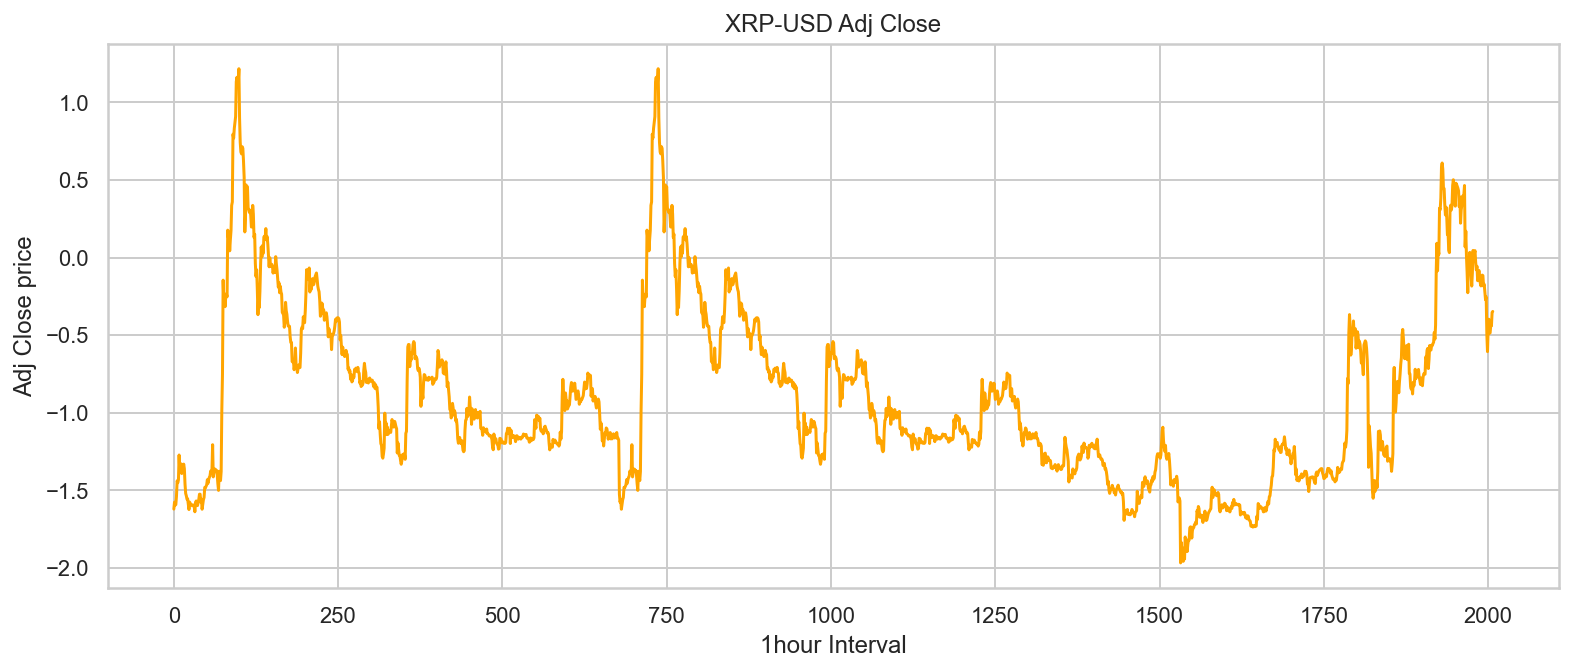

In [121]:
XRPlog['XRP-USD Adj Close'].plot(figsize=(13,5),color = 'orange')
plt.xlabel("1hour Interval")
plt.ylabel("Adj Close price")
plt.title("XRP-USD Adj Close")

### Augmented Dickey-Fuller Test on XRP/USD

In [122]:
 X = XRPlog["XRP-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -3.931350
p-value: 0.001816
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time series in stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [123]:
def kpss_test(XRP):
    statistic , p_value , n_lags, critical_values = kpss(XRPlog['XRP-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series is stationary")
        
kpss_test(LTC)

 KPSS Statistics:0.3055248346129637
 p-value: 0.01
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## First difference on XRP/USD

In [124]:
XRP_stationary = XRPlog.diff().dropna()
XRP_stationary

,XRP-USD Adj Close
1,0.044570
2,-0.018847
3,0.003163
4,0.054815
5,0.098541
...,...
2003,0.003438
2004,0.049898
2005,-0.004923
2006,0.086237


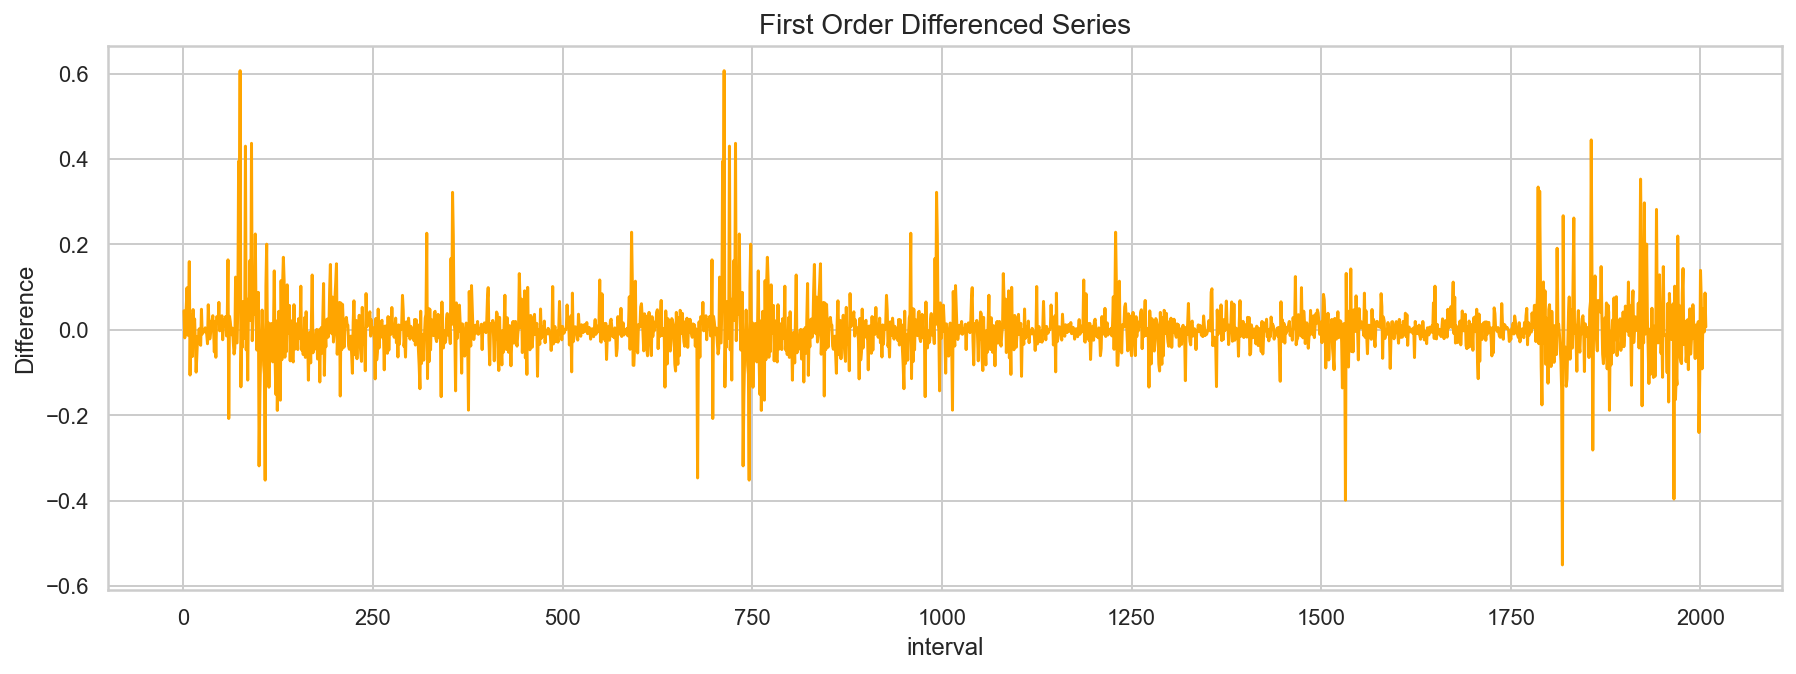

In [125]:
plt.figure(figsize=(15, 5))
plt.plot(XRP_stationary, color = 'orange')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after fist difference 

In [126]:
def kpss_test(XRP):
    statistic , p_value , n_lags, critical_values = kpss(XRP_stationary['XRP-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.03684394570912847
 p-value: 0.1
 num lags: 26
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/huigong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
